<h1 style="text-align:center">
    Estadísticas de Accidentes en Madrid
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    Mathias Kneis Pino
</h3>
    
<h3 style="text-align:center">
    25/01/2022
</h3>

<hr>

## Introducción
    
<font color="darkblue"> En este proyecto se desarrolla en Python un análisis básico de datos sobre accidentes de tráfico de la comunidad de Madrid. Los datos fueron obtenidos desde el archivo "2020_Accidentalidad.csv", el cual venía dentro del material de estudio entregado al comienzo del módulo. 
    
<font color="darkblue"> Duarante el curso de este análisis, se pudieron obtener datos como la tasa de muerte por rango horario y la tasa de muertes por rangos de edad, dentro de otros. 
    
<font color="darkblue">Para lograr desarrollar cada uno de los apartados he utilizado el conocimiento adquirido durante el módulo, además de otros recursos encontrados en internet. 
    
<font color="darkblue">He podido resolver cada uno de los apartados, tal vez no de la manera mas eficiente debido a mi poca experiencia en el uso de un lenguaje de programación, pero consiguiendo los resultados requeridos. 

## a) Algunas operaciones sencillas [2 puntos]

Vamos a trabajar con una tabla del INE que contiene información sobre el paro en España. Abriendo el archivo, vemos algo así:

<center>
    <img src="./images/tabla_1.png" width="800">
</center>

Si miramos una línea de esta tabla (salvo la primera, que es la cabecera), encontamos lo siguiente:
    
<table>
  <tr>
    <th>2020S000073</th>
    <th>01/01/2020</th>
    <th>18:48</th>
    <th>AVDA. PIO XII</th>
    <th>81</th>
    <th>CHAMARTÍN</th>
    <th>Atropello a persona</th>
    <th>Despejado</th>
    <th>Turismo</th>
    <th>Conductor</th>
    <th>DE 55 A 59 AÑOS</th>
    <th>Hombre</th>
    <th>14</th>
    <th> </th>
  </tr>
</table>

Pero si inspeccionamos el archivo con un editor de texto, vemos que esa línea es como sigue:

    2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;

Una cadena de caracteres. Hagamos en Python algunas operaciones básicas con los algunos de los datos anteriores y con la cadena en sí.

**a.1 Redondeo de la hora**

La primera operación consiste en redondear una hora, simplemente despreciando los minutos y dando lugar al entero correspondiente, entre 0 y 23. 

In [1]:
# Esta celda debe ser completada por el estudiante
def redondeo_hora(hora):
    """
    Dada una hora en el formato "hh:mm", extrae en forma de entero tan solo la parte relacionada a la hora, despreciando
    los minutos.
    
    Parámetros
    ----------
    hora: str
        String que contiene una hora en formato "hh:mm" 
    
    Returns
    -------
    int
        La hora representada en un numero entero entre 0 y 23
    
    Ejemplo
    -------
    >>> redondeo_hora('13:05')
    13
    """
    enteros_hora = hora.split(sep = ":") # Separa la hora en dos partes. Ejemplo '12:30' -> [12, 30]
    return int(enteros_hora[0])
    



<font color="darkblue">**a.1.1 Explicacion de la función**

<font color="darkblue">Para lograr redondear una hora en un entero entre 0 y 23, se utilizo la funcion split() la cual permite separa un string en una lista definiendo un separador, el cual en este caso fue ":". Una vez obtenida la lista,  mediante su índice se pide que devuelva tan solo el item [0] de la lista entregada.

In [2]:
# Pruebas de funcionamiento:

print(redondeo_hora('12:48'))

12


Es bastante habitual hacer varias pruebas a la vez:

In [3]:
# Pruebas de funcionamiento:

for h in ['15:00', '23:15', '14:22']:
    print(redondeo_hora(h))

15
23
14


**a.2 Rangos de edad**

Ahora, deseamos codificar los rangos de edad, asignando a cada rango descrito un intervalo de dos enteros. El ejemplo de funcionamiento te aclarará lo que se pide exactamente: 

In [4]:
# Esta celda debe ser completada por el estudiante
def rango_edad(c):
    """
    Crea un rango de edad en el formato (a, b).
    
    Parameters
    ----------
    c: str 
        String con el rango de edad. Ejemplo: "DE 25 A 29 AÑOS"
    
    Returns
    -------
    tuple
        Un rango de edad representado por dos enteros dentro de una tupla
    
    Ejemplo
    -------
    >>> rango_edad("DE 25 A 29 AÑOS")
    (25, 29)
    """
    if c == "DESCONOCIDA":
        return (-1,-1)
    elif c == "MAYOR DE 74 AÑOS":
        return (75, 100)
    else:
        rango_descompuesto = c.split() # Descomposición de la linea de texto en una lista de palabras.
        return (int(rango_descompuesto[1]), int(rango_descompuesto[3])) # Selección de los caracteres necesitados.
    



<font color="darkblue">**a.2.1 Explicación de la función**

<font color="darkblue">Esta funcion tiene como objetivo pasar a un intervalo de dos enteros una linea de texto con el formato "DE 25 A 29 AÑOS", para conseguir esto se comenzó con una condicional if y elif para los casos en que los rangos de edad eran "DESCONOCIDA" y "MAYOR DE 74 AÑOS. Para estos casos la funcion debe devolver (-1, -1) o (75, 100) según el caso correspondiente. Para todo el resto de rangos de edades que se encuentran entre medio, se utiliza una funcion split() para integrar cada una de las palabras de la linea de texto a una lista para luego poder seleccionar solo los caracteres necesarios mediante sus índices, los cuales se encontraban en los lugares [1] y [3].



In [5]:
# Pruebas de funcionamiento:

for c in  ['DE 25 A 29 AÑOS', 'DESCONOCIDA', 'MAYOR DE 74 AÑOS']:
    print(c, " -> ", rango_edad(c))

DE 25 A 29 AÑOS  ->  (25, 29)
DESCONOCIDA  ->  (-1, -1)
MAYOR DE 74 AÑOS  ->  (75, 100)


**a.3 Lesividad: datos en blanco**

El dato de lesividad viene codificado con un entero:

    01 Atención en urgencias sin posterior ingreso. - LEVE
    02 Ingreso inferior o igual a 24 horas - LEVE
    ...
    77 Se desconoce
    En blanco Sin asistencia sanitaria
    
Deseamos convertir este dato en un número entero. Cuando no se requiere asistencia sanitaria vamos a codificar esto con el entero 0 por homogeneidad. Cuando la lesividad no se conoce (un dato missing por ejemplo), también la consignaremos con un cero.

In [6]:
# Esta celda debe ser completada por el estudiante
def lesividad(c):
    """
    Convierte Código del grado de lesividad en un numero entero.
    
    Parameters
    ----------
    c: str
        Dato que representa un grado de lesividad dentro del dataset "2020_Accidentalidad.csv"
        
    
    Returns
    -------
    int
        Código del grado de lesividad en formato entero
    
    Ejemplo
    -------
    >>> lesividad("01")
    1
    """
    if c == "14": # Como ya es un numero entero al igual que "77", solo hay que convertirlo a un integer.
        return 14
    elif c == "77":
        return 77
    elif c == "": 
        return 0
    else:
        return int(c[1]) # Selecciona el segundo caracter del string y lo convierte en integer.


<font color="darkblue">**a.3.1 Explicación de la función**

<font color="darkblue">Esta función permite obtener un entero a partir de un string con formato "02" o "14". Para lograr esto se utilizó una condicional if para los 3 casos excepcionales, los cuales eran los datos "14", "77" y " ". Para el resto de los datos, los cuales van desde "01" a "07", se creó el entero seleccionando mediante su indice el segundo caracter del string dado (c[1]) para luego aplicarle la funcion int().


In [7]:
# Pruebas de funcionamiento:

for c in  ['01', '02', '14', '', '77']:
    print(c, " -> ", lesividad(c))

01  ->  1
02  ->  2
14  ->  14
  ->  0
77  ->  77


**a.4 Operaciones con una línea de datos**

Si ahora abres el archivo de datos con un editor de texto, podrás ver algo parecido a lo siguiente:

<center>
    <img src="./images/tabla_2.png" width="800">
</center>

La línea novena es la que poníamos antes como ejemplo. Vista como una cadena de caracteres, podemos almacenarla en una variable para procesarla:


    linea_9 = "2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;"

Y luego, podríamos hacer con ella algunas operaciones básicas, separando sus piezas (con el método `split`), extrayendo alguna que nos interese (accediendo a la componente adecuada con el corchete `[...]`, y estas piezas se pueden manejar con las funciones definicas antes, `redondeo_hora` y `rango_edad`.

En una primera versión, esto puede hacerse con una función que va imprimiendo las cosas, así:

    def presentar_operaciones_basicas(cadena):
        print("La cadena de entrada: ")
        print(cadena)
        print()
        print("Piezas: ")
        ...

In [8]:
# Esta celda debe ser completada por el estudiante
def presentar_operaciones_basicas(cadena):
    """
    Dada una linea del dataset "2020_Accidentalidad.csv" en formato string, devuelve impreso en pantalla la cadena de entrada,
    una lista con los datos de la linea, el distrito, la hora sin y con redondeo, y la edad tal como viene y en su rango.
    
    Parámetros
    ----------
    cadena: str
        Linea del dataset "2020_Accidentalidad" en formato string
    
    Returns
    -------
        La cadena de entrada
        Piezas
        Distrito
        La hora, sin y con redondeo
        La edad, tal como viene y en su rango
    
    Ejemplo
    -------
    >>> presentar_operaciones_basicas("2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;")
    La cadena de entrada: 
    2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;

    Piezas: 
    ['2020S000073', '01/01/2020', '18:48', 'AVDA. PIO XII', '81', 'CHAMARTÍN', 'Atropello a persona', 'Despejado', 'Turismo', 'Conductor', 'DE 55 A 59 AÑOS', 'Hombre', '14', '', '']

    Distrito: 
    CHAMARTÍN

    La hora, sin y con redondeo: 
    18:48
    18

    La edad, tal como viene y en su rango: 
    DE 55 A 59 AÑOS
    (55, 59)
    """
    print("La cadena de entrada: ")
    print(cadena)
    print()
    print("Piezas: ")
    cadena_split = cadena.split(sep = ";")
    print(cadena_split)
    print()
    print("Distrito: ")
    print(cadena_split[5])
    print()
    print("La hora, sin y con redondeo: ")
    print(cadena_split[2])
    print(redondeo_hora(cadena_split[2]))
    print()
    print("La edad, tal como viene y en su rango: ")
    print(cadena_split[10])
    print(rango_edad(str(cadena_split[10])))
    


In [9]:
# Ejemplo de funcionamiento:

linea_9 = "2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;"
presentar_operaciones_basicas(linea_9)

La cadena de entrada: 
2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;

Piezas: 
['2020S000073', '01/01/2020', '18:48', 'AVDA. PIO XII', '81', 'CHAMARTÍN', 'Atropello a persona', 'Despejado', 'Turismo', 'Conductor', 'DE 55 A 59 AÑOS', 'Hombre', '14', '', '']

Distrito: 
CHAMARTÍN

La hora, sin y con redondeo: 
18:48
18

La edad, tal como viene y en su rango: 
DE 55 A 59 AÑOS
(55, 59)


Decíamos que, en una primera versión, esto puede hacerse con una función que va imprimiendo las cosas. 
Pero realmente, no es el estilo deseable. Preferimos una función que no escriba nada, que devuelva su resultado con `return`. Y de paso, que devuelva únicamente las piezas que nos interesan, por ejemplo: la hora (redondeada), el distrito, el estado meteorológico, el rango de edad y el nivel (entero) de lesividad del accidente.

(Lógicamente, según el objetivo que nos interese, podría ser necesario luego cargar unos campos u otros.)

In [10]:
# Esta celda debe ser completada por el estudiante
def extraer_datos(datos):
    """
    Dada una linea del dataset "2020_Accidentalidad.csv", entrega una lista con los datos de la hora(redondeada), el distrito
    el estado meteorológico, el rango de edad y el nivel(entero) de lesividad del accidente.
    
    Parámetros
    ----------
    datos: str
        Linea del dataset "2020_Accidentalidad" en formato string
    
    Returns
    -------
        list
        Lista con los siguientes datos: DISTRITO, ESTADO METEOROLÓGICO, RANGO DE EDAD y LESIVIDAD*.
    
    Example
    -------
    >>> linea_9 = "2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;"
    >>> extraer_datos(linea_9)
    [18, 'CHAMARTÍN', 'Despejado', (55, 59), 14]
    """
    datos_split = datos.split(";") # Funcion split para separa el string en una lista de datos.
    hora = redondeo_hora(datos_split[2]) # Seleccion de la hora en la lista y aplicación de la función redondeo_hora.
    distrito = datos_split[5]
    meteo = datos_split[7]
    edad = rango_edad(datos_split[10]) # Seleccion de la edad y aplicación de la función rango_edad.
    nivel = lesividad(datos_split[12]) # Seleccion de la lesividad y aplicación de la funcion lesividad.
    return [hora, distrito, meteo, edad, nivel]


<font color="darkblue">**a.4.1 Explicación de la función**

<font color="darkblue">Esta funcion permite extraer desde un string de datos, una lista con los datos de hora, distrito, estado metereologico, rango de edad y lesividad. Para lograr esto primero se utilizó la función split() para separar los datos del string en una lista, para asi luego poder seleccionar los datos necesitados mediante sus índices.

In [11]:
# Pruebas de funcionamiento:

print(len(linea_9.split(";")))
print(extraer_datos(linea_9))

15
[18, 'CHAMARTÍN', 'Despejado', (55, 59), 14]


## b) Lectura de datos del archivo [2 puntos]

En este apartado te planteo diseñar tres funciones de lectura de datos.

**b.1. Cabecera** La primera función leerá la cabecera del archivo de datos, esto es, su primera línea, y la descompondrá en los rótulos correspondientes a cada columna. Además de abrir el archivo (preferiblemente con la instrucción `with open...`), bastará con un único `readline`.

In [12]:
# Esta celda debe ser completada por el estudiante
def cargar_cabecera(archivo):
    """
    Dado un archivo .csv, la función entrega el encabezado de este archivo (primera linea).
    
    Parámetros
    ----------
    archivo: str
        Archivo del tipo CSV
    
    Returns
    -------
        list
        Lista con los nombres de las columnas
        
    Ejemplo
    -------
    >>> encabezados = cargar_cabecera("2020_Accidentalidad.csv")
    >>> print(encabezados)
    ['Nº  EXPEDIENTE', 'FECHA', 'HORA', 'CALLE', 'NÚMERO', 'DISTRITO', 'TIPO ACCIDENTE', 'ESTADO METEREOLÓGICO', 'TIPO VEHÍCULO', 'TIPO PERSONA', 'RANGO DE EDAD', 'SEXO', 'LESIVIDAD*', '', '']
    
    """
    with open(archivo, "r") as f:
        cabecera = f.readline()  # La funcion readline() permite leer una linea completa del archivo, en este caso es la primera.
        cabecera_sin_espacios = cabecera.strip() # La funcion strip() elimina los espacios existentes al comienzo y final de un string.
        return cabecera_sin_espacios.split(sep = ";") # Se aplica una función split para generar una lista con lo nombres de las columnas.



<font color="darkblue">**b.1.1 Explicación de la función**

<font color="darkblue">Esta función permite la lectura del encabezado de un archivo de datos. Para lograr esto se comenzó con la carga de archivo mediante la operación with open, luego se eliminaron los espacios existentes al comienzo y final del string mediante la función strip(). Finalmente la función devuelve una lista con los distintos encabezados de las columnas.

In [13]:
# Pruebas de funcionamiento:

cabecera = cargar_cabecera("2020_Accidentalidad.csv")
print(cabecera)

['Nº  EXPEDIENTE', 'FECHA', 'HORA', 'CALLE', 'NÚMERO', 'DISTRITO', 'TIPO ACCIDENTE', 'ESTADO METEREOLÓGICO', 'TIPO VEHÍCULO', 'TIPO PERSONA', 'RANGO DE EDAD', 'SEXO', 'LESIVIDAD*', '', '']


**b.2 Lectura de algunas líneas del archivo**

Ahora, nos interesa leer justamente los datos a partir de la cabecera, esto es algunas de las demás líneas. Una forma de saltarnos esa primera línea es usar la instrucción `next`. Pongamos que queremos leer desde la línea $17$ hasta la $23$. Podemos leer (sin procesar) $17-1$ líneas y luego, podemos leer y retener $23-17+1$ líneas.

In [14]:
# Esta celda debe ser completada por el estudiante
def cargar_lineas(archivo, a=1, b= 10):
    """
    Carga un rango de lineas de un archivo especificado dentro de los parámetros.
    
    Parámetros
    ----------
    archivo: str
        Nombre del archivo .csv
    a: int
        Primer número  
    b: int
        Segundo número 
      
    Returns
    -------
        list
        Lista con los datos del archivo desde la linea a hasta la b
    
    Ejemplo
    -------
    >>> lineas_lista = cargar_lineas("2020_Accidentalidad.csv", 1, 3)
    >>> for linea in lineas_lista:
            print(linea)
    [23, 'RETIRO', 'Despejado', (25, 29), 0]
    [22, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
    [20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
    """
    with open (archivo,"r") as f: # Carga del archivo
        lista = f.readlines()[a:b+1] # Readlines() transforma el archivo en una lista con las diferentes lineas.
        return list(map(extraer_datos, lista)) # Extracción de los datos necesitados mediante la función extraer_datos.
    


<font color="darkblue">**b.2.1 Explicación de la función**

<font color="darkblue">La función cargar_lineas() permite la carga de las lineas requeridas, la cuales se pueden explicitar dentro los parametros de la función, si no es así, la función devolvera por default las lineas 1 a 10 del archivo de datos. Para lograr esto se comenzo con la carga del archivo mediante la operación with open, para luego aplicar la función readlines() la cual permite cargar a una lista todas las lineas del archivo de datos y seleccionar mediantes sus indices solo las lineas requeridas acorde a los parametros a y b entregados. Finalmente mediante la función map() se le aplica a cada uno de los datos dentro de la variable lista la función extraer_datos() para asi obtener solo los datos necesarios para la correcta continuación del análisis.

In [15]:
lineas_lista = cargar_lineas("2020_Accidentalidad.csv", 1, 4)

for linea in lineas_lista:
    print(linea)
    
# Si no decimos qué líneas nos interesa, se cargarán las diez primeras.
# (Esto puede hacerse con dos parámetros por defecto.)

print()

lineas_lista = cargar_lineas("2020_Accidentalidad.csv")

for linea in lineas_lista:
    print(linea)

[23, 'RETIRO', 'Despejado', (25, 29), 0]
[22, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]

[23, 'RETIRO', 'Despejado', (25, 29), 0]
[22, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]
[19, 'CENTRO', 'Despejado', (-1, -1), 0]
[19, 'CARABANCHEL', 'Despejado', (-1, -1), 14]
[19, 'CARABANCHEL', 'Despejado', (21, 24), 2]
[18, 'CHAMARTÍN', 'Despejado', (55, 59), 14]
[18, 'CHAMARTÍN', 'Despejado', (18, 20), 7]
[18, 'ARGANZUELA', '', (55, 59), 14]


**b.3 Lectura de todas las líneas del archivo**

Lo normal es desear cargar **todos** los datos de un archivo, y no sólo unas pocas líneas, excluyendo la cabecera. Al igual que en la función anterior, te pido que el resultado se dé en una lista, donde cada elemento recoge la información de una línea del archivo de datos, salvo la cabecera, pero incluyendo ahora **todas** esas líneas, sin dar opción a cuáles nos interesa, aunque luego deseemos mostrar tan solo unas pocas. Véanse ambas pruebas de funcionamiento. 

In [16]:
# Esta celda debe ser completada por el estudiante
def cargar_datos(archivo):
    """
    Carga en formato de una lista, todas las lineas de un archivo .csv con los datos de la hora, distrito, estado metereológico,
    rango de edad y grado de lesividad.
    
    Parámetros
    ----------
    archivo: str
        Archivo . csv
    
    Returns
    -------
        list
        Lista con todas las lineas del archivo cargado
    
    Ejemplo
    -------
    >>> datos_lista = cargar_datos("2020_Accidentalidad.csv")
    >>> for linea in datos_lista:
            print(linea)
    [23, 'RETIRO', 'Despejado', (25, 29), 0]
    [22, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
    [20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
    [20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]
    [19, 'CENTRO', 'Despejado', (-1, -1), 0]
    [19, 'CARABANCHEL', 'Despejado', (-1, -1), 14]...
    """
    with open (archivo,"r") as f:
        lista = f.readlines()[1:] # Carga todas las lineas del archivo de datos menos el encabezado.
        return list(map(extraer_datos, lista))



<font color="darkblue">**b.3.1 Explicación de la función**

<font color="darkblue">La función cargar_datos() permite la carga de todas las lineas dentro del archivo de datos, menos la primera linea la cual corresponde a los encabezados. Para lograr esto se utilizo la función readlines() seleccionando mediante sus índices todas las lineas dentro del archivo de datos, comenzando desde la linea número 2 ([1:]). Finalmente se le aplica a cada una de las lineas dentro de la variable lista la función extraer_datos, mediante la función map(), para así obtener solo los datos requeridos para la correcta continuación del análisis

In [17]:
# Pruebas de funcionamiento:

datos_lista = cargar_datos("2020_Accidentalidad.csv")

for linea in datos_lista:
    print(linea)    

[23, 'RETIRO', 'Despejado', (25, 29), 0]
[22, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]
[19, 'CENTRO', 'Despejado', (-1, -1), 0]
[19, 'CARABANCHEL', 'Despejado', (-1, -1), 14]
[19, 'CARABANCHEL', 'Despejado', (21, 24), 2]
[18, 'CHAMARTÍN', 'Despejado', (55, 59), 14]
[18, 'CHAMARTÍN', 'Despejado', (18, 20), 7]
[18, 'ARGANZUELA', '', (55, 59), 14]
[18, 'ARGANZUELA', '', (35, 39), 14]
[16, 'HORTALEZA', 'Despejado', (40, 44), 0]
[16, 'HORTALEZA', 'Despejado', (30, 34), 0]
[16, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[16, 'PUENTE DE VALLECAS', 'Despejado', (45, 49), 14]
[16, 'PUENTE DE VALLECAS', 'Despejado', (35, 39), 2]
[16, 'PUENTE DE VALLECAS', 'Despejado', (40, 44), 2]
[16, 'PUENTE DE VALLECAS', 'Despejado', (45, 49), 2]
[15, 'HORTALEZA', 'Despejado', (21, 24), 14]
[15, 'HORTALEZA', 'Despejado', (18, 20), 0]
[15, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[15, 'HORTALEZA', 'Despej

[13, 'TETUÁN', 'Despejado', (45, 49), 14]
[13, 'CIUDAD LINEAL', 'Despejado', (55, 59), 6]
[13, 'CIUDAD LINEAL', 'Despejado', (55, 59), 6]
[13, 'CIUDAD LINEAL', 'Despejado', (30, 34), 14]
[13, 'CIUDAD LINEAL', 'Despejado', (30, 34), 14]
[13, 'CIUDAD LINEAL', 'Despejado', (45, 49), 0]
[13, 'CIUDAD LINEAL', 'Despejado', (30, 34), 0]
[13, 'TETUÁN', 'Despejado', (25, 29), 2]
[13, 'TETUÁN', 'Despejado', (45, 49), 14]
[13, 'SAN BLAS-CANILLEJAS', 'Despejado', (35, 39), 0]
[13, 'SAN BLAS-CANILLEJAS', 'Despejado', (30, 34), 0]
[13, 'SAN BLAS-CANILLEJAS', 'Despejado', (45, 49), 0]
[13, 'SAN BLAS-CANILLEJAS', 'Despejado', (70, 74), 0]
[11, 'SALAMANCA', 'Despejado', (55, 59), 14]
[11, 'SALAMANCA', 'Despejado', (45, 49), 2]
[11, 'PUENTE DE VALLECAS', '', (-1, -1), 0]
[11, 'FUENCARRAL-EL PARDO', 'Despejado', (60, 64), 7]
[11, 'FUENCARRAL-EL PARDO', 'Despejado', (50, 54), 14]
[11, 'TETUÁN', 'Despejado', (50, 54), 0]
[11, 'TETUÁN', 'Despejado', (25, 29), 0]
[11, 'CARABANCHEL', 'Despejado', (50, 54), 0]

[19, 'CARABANCHEL', 'Despejado', (50, 54), 7]
[19, 'CARABANCHEL', 'Despejado', (45, 49), 14]
[18, 'VILLAVERDE', 'Despejado', (40, 44), 0]
[17, 'SALAMANCA', 'Nublado', (21, 24), 14]
[17, 'SALAMANCA', 'Nublado', (21, 24), 14]
[17, 'SALAMANCA', 'Nublado', (25, 29), 2]
[17, 'SALAMANCA', 'Nublado', (21, 24), 2]
[17, 'FUENCARRAL-EL PARDO', 'Despejado', (35, 39), 0]
[17, 'FUENCARRAL-EL PARDO', 'Despejado', (-1, -1), 0]
[17, 'CENTRO', 'Despejado', (40, 44), 14]
[17, 'CENTRO', 'Despejado', (25, 29), 6]
[16, 'RETIRO', 'Despejado', (25, 29), 0]
[16, 'CARABANCHEL', 'Despejado', (65, 69), 0]
[16, 'CARABANCHEL', 'Despejado', (30, 34), 0]
[16, 'CARABANCHEL', 'Despejado', (25, 29), 0]
[15, 'CARABANCHEL', 'Despejado', (45, 49), 0]
[15, 'CARABANCHEL', 'Despejado', (40, 44), 0]
[15, 'VILLA DE VALLECAS', 'Despejado', (55, 59), 14]
[15, 'VILLA DE VALLECAS', 'Despejado', (30, 34), 7]
[14, 'TETUÁN', 'Nublado', (50, 54), 14]
[14, 'TETUÁN', 'Nublado', (70, 74), 2]
[14, 'FUENCARRAL-EL PARDO', 'Despejado', (21, 

[17, 'SALAMANCA', 'Despejado', (-1, -1), 0]
[17, 'USERA', '', (-1, -1), 0]
[17, 'HORTALEZA', 'Nublado', (21, 24), 14]
[17, 'HORTALEZA', 'Nublado', (40, 44), 3]
[17, 'MONCLOA-ARAVACA', 'Despejado', (75, 100), 7]
[17, 'MONCLOA-ARAVACA', 'Despejado', (75, 100), 7]
[17, 'MONCLOA-ARAVACA', 'Despejado', (30, 34), 14]
[17, 'MONCLOA-ARAVACA', 'Despejado', (65, 69), 14]
[17, 'MONCLOA-ARAVACA', 'Despejado', (18, 20), 14]
[17, 'MONCLOA-ARAVACA', 'Despejado', (45, 49), 14]
[17, 'MONCLOA-ARAVACA', 'Despejado', (45, 49), 14]
[17, 'SAN BLAS-CANILLEJAS', 'Despejado', (25, 29), 0]
[17, 'SAN BLAS-CANILLEJAS', 'Despejado', (18, 20), 0]
[17, 'SAN BLAS-CANILLEJAS', 'Despejado', (50, 54), 0]
[17, 'SAN BLAS-CANILLEJAS', 'Despejado', (21, 24), 0]
[17, 'SAN BLAS-CANILLEJAS', 'Despejado', (25, 29), 0]
[16, 'CIUDAD LINEAL', 'Despejado', (21, 24), 14]
[16, 'CIUDAD LINEAL', 'Despejado', (21, 24), 14]
[16, 'CIUDAD LINEAL', 'Despejado', (25, 29), 7]
[15, 'PUENTE DE VALLECAS', 'Despejado', (35, 39), 0]
[15, 'PUENTE D

[18, 'LATINA', 'Despejado', (35, 39), 1]
[18, 'LATINA', 'Despejado', (45, 49), 7]
[18, 'LATINA', 'Despejado', (21, 24), 14]
[18, 'LATINA', 'Despejado', (30, 34), 14]
[18, 'CHAMARTÍN', 'Despejado', (55, 59), 0]
[18, 'CHAMARTÍN', 'Despejado', (40, 44), 0]
[18, 'CHAMARTÍN', 'Despejado', (6, 9), 0]
[18, 'CHAMARTÍN', 'Despejado', (0, 5), 0]
[18, 'TETUÁN', 'Despejado', (21, 24), 7]
[18, 'RETIRO', 'Despejado', (40, 44), 0]
[18, 'RETIRO', 'Despejado', (25, 29), 0]
[17, 'LATINA', 'Despejado', (35, 39), 7]
[17, 'LATINA', 'Despejado', (60, 64), 14]
[17, 'CHAMARTÍN', '', (45, 49), 0]
[17, 'CHAMARTÍN', '', (6, 9), 0]
[17, 'CHAMARTÍN', '', (10, 14), 0]
[17, 'CHAMARTÍN', '', (50, 54), 0]
[17, 'CHAMARTÍN', '', (10, 14), 0]
[17, 'SALAMANCA', 'Despejado', (45, 49), 0]
[17, 'SALAMANCA', 'Despejado', (45, 49), 0]
[16, 'LATINA', 'Despejado', (35, 39), 14]
[16, 'LATINA', 'Despejado', (55, 59), 14]
[16, 'LATINA', 'Despejado', (10, 14), 14]
[16, 'LATINA', 'Despejado', (0, 5), 14]
[16, 'LATINA', 'Despejado', (

[14, 'USERA', 'Despejado', (55, 59), 14]
[14, 'USERA', 'Despejado', (60, 64), 14]
[14, 'USERA', 'Despejado', (30, 34), 14]
[14, 'USERA', 'Despejado', (30, 34), 14]
[14, 'PUENTE DE VALLECAS', 'Despejado', (60, 64), 7]
[14, 'PUENTE DE VALLECAS', 'Despejado', (50, 54), 14]
[14, 'PUENTE DE VALLECAS', 'Despejado', (40, 44), 14]
[14, 'PUENTE DE VALLECAS', 'Despejado', (50, 54), 3]
[12, 'HORTALEZA', 'Despejado', (40, 44), 7]
[11, 'VILLAVERDE', '', (40, 44), 0]
[11, 'VILLAVERDE', '', (-1, -1), 0]
[11, 'VILLAVERDE', '', (-1, -1), 0]
[9, 'CIUDAD LINEAL', 'Despejado', (35, 39), 0]
[9, 'CIUDAD LINEAL', 'Despejado', (40, 44), 0]
[9, 'SALAMANCA', 'Nublado', (35, 39), 0]
[9, 'SALAMANCA', 'Nublado', (50, 54), 0]
[9, 'SALAMANCA', 'Nublado', (60, 64), 0]
[9, 'TETUÁN', 'Nublado', (21, 24), 14]
[9, 'TETUÁN', 'Nublado', (35, 39), 7]
[9, 'TETUÁN', 'Nublado', (21, 24), 7]
[9, 'TETUÁN', 'Nublado', (18, 20), 14]
[9, 'SALAMANCA', 'Despejado', (35, 39), 14]
[9, 'SALAMANCA', 'Despejado', (30, 34), 0]
[9, 'SALAMAN

[0, 'TETUÁN', '', (45, 49), 0]
[23, 'CIUDAD LINEAL', 'Despejado', (18, 20), 14]
[23, 'CIUDAD LINEAL', 'Despejado', (75, 100), 6]
[23, 'CIUDAD LINEAL', 'Despejado', (70, 74), 6]
[23, 'CIUDAD LINEAL', 'Despejado', (25, 29), 6]
[23, 'SALAMANCA', 'Despejado', (50, 54), 14]
[22, 'MORATALAZ', 'Despejado', (35, 39), 0]
[21, 'ARGANZUELA', 'Despejado', (60, 64), 0]
[21, 'ARGANZUELA', 'Despejado', (45, 49), 14]
[21, 'PUENTE DE VALLECAS', 'Despejado', (40, 44), 14]
[21, 'PUENTE DE VALLECAS', 'Despejado', (30, 34), 6]
[20, 'CIUDAD LINEAL', 'Despejado', (40, 44), 14]
[20, 'CIUDAD LINEAL', 'Despejado', (55, 59), 14]
[20, 'MORATALAZ', 'Despejado', (45, 49), 7]
[20, 'MORATALAZ', 'Despejado', (60, 64), 14]
[20, 'CIUDAD LINEAL', '', (35, 39), 0]
[20, 'CIUDAD LINEAL', '', (65, 69), 0]
[20, 'SALAMANCA', 'Despejado', (40, 44), 14]
[20, 'SALAMANCA', 'Despejado', (30, 34), 14]
[20, 'SALAMANCA', 'Despejado', (25, 29), 7]
[20, 'CHAMBERÍ', 'Despejado', (45, 49), 14]
[20, 'CHAMBERÍ', 'Despejado', (10, 14), 7]
[2

[13, 'RETIRO', 'Despejado', (-1, -1), 0]
[13, 'CHAMARTÍN', 'Despejado', (65, 69), 14]
[13, 'CHAMARTÍN', 'Despejado', (70, 74), 4]
[12, 'TETUÁN', 'Despejado', (50, 54), 0]
[12, 'TETUÁN', 'Despejado', (40, 44), 0]
[11, 'HORTALEZA', '', (45, 49), 0]
[11, 'HORTALEZA', '', (35, 39), 0]
[11, 'HORTALEZA', '', (45, 49), 0]
[11, 'SALAMANCA', 'Despejado', (30, 34), 14]
[11, 'SALAMANCA', 'Despejado', (35, 39), 6]
[11, 'SALAMANCA', 'Despejado', (55, 59), 14]
[11, 'SALAMANCA', 'Despejado', (21, 24), 14]
[11, 'SALAMANCA', 'Despejado', (6, 9), 14]
[11, 'SALAMANCA', 'Despejado', (60, 64), 1]
[10, 'MONCLOA-ARAVACA', 'Despejado', (75, 100), 1]
[10, 'RETIRO', 'Despejado', (65, 69), 14]
[10, 'RETIRO', 'Despejado', (55, 59), 7]
[10, 'TETUÁN', 'Despejado', (50, 54), 3]
[10, 'TETUÁN', 'Despejado', (40, 44), 7]
[10, 'TETUÁN', 'Despejado', (35, 39), 7]
[9, 'MORATALAZ', 'Despejado', (75, 100), 14]
[9, 'MORATALAZ', 'Despejado', (25, 29), 14]
[9, 'USERA', 'Se desconoce', (35, 39), 14]
[9, 'USERA', 'Se desconoce',

[9, 'SALAMANCA', 'Nublado', (45, 49), 6]
[8, 'SALAMANCA', 'Nublado', (30, 34), 2]
[8, 'SAN BLAS-CANILLEJAS', 'Nublado', (25, 29), 14]
[8, 'SAN BLAS-CANILLEJAS', 'Nublado', (45, 49), 7]
[8, 'CENTRO', 'Nublado', (50, 54), 2]
[8, 'HORTALEZA', '', (-1, -1), 0]
[8, 'HORTALEZA', '', (21, 24), 0]
[7, 'RETIRO', 'Lluvia débil', (40, 44), 0]
[7, 'RETIRO', 'Lluvia débil', (-1, -1), 0]
[7, 'RETIRO', 'Lluvia débil', (-1, -1), 0]
[7, 'CHAMBERÍ', 'Lluvia débil', (65, 69), 14]
[7, 'CHAMBERÍ', 'Lluvia débil', (65, 69), 7]
[6, 'FUENCARRAL-EL PARDO', 'Lluvia débil', (55, 59), 0]
[6, 'FUENCARRAL-EL PARDO', 'Lluvia débil', (45, 49), 14]
[6, 'FUENCARRAL-EL PARDO', 'Lluvia débil', (30, 34), 1]
[6, 'FUENCARRAL-EL PARDO', 'Lluvia débil', (30, 34), 1]
[5, 'BARAJAS', 'Lluvia débil', (40, 44), 0]
[5, 'BARAJAS', 'Lluvia débil', (-1, -1), 0]
[5, 'FUENCARRAL-EL PARDO', 'LLuvia intensa', (40, 44), 0]
[4, 'LATINA', 'Lluvia débil', (-1, -1), 0]
[4, 'LATINA', 'Lluvia débil', (18, 20), 2]
[2, 'MONCLOA-ARAVACA', '', (45, 

[8, 'VILLA DE VALLECAS', 'Despejado', (60, 64), 14]
[8, 'CIUDAD LINEAL', 'Despejado', (30, 34), 7]
[8, 'CIUDAD LINEAL', 'Despejado', (25, 29), 14]
[6, 'HORTALEZA', 'Despejado', (25, 29), 2]
[6, 'CIUDAD LINEAL', 'Despejado', (-1, -1), 0]
[6, 'CIUDAD LINEAL', 'Despejado', (-1, -1), 0]
[6, 'CIUDAD LINEAL', 'Despejado', (-1, -1), 0]
[6, 'CIUDAD LINEAL', 'Despejado', (-1, -1), 0]
[1, 'VILLA DE VALLECAS', 'Despejado', (45, 49), 7]
[22, 'USERA', '', (25, 29), 14]
[22, 'USERA', '', (50, 54), 14]
[22, 'CARABANCHEL', 'Despejado', (30, 34), 14]
[22, 'CARABANCHEL', 'Despejado', (35, 39), 14]
[22, 'CARABANCHEL', 'Despejado', (50, 54), 7]
[22, 'CARABANCHEL', 'Despejado', (35, 39), 2]
[22, 'HORTALEZA', 'Despejado', (45, 49), 14]
[22, 'HORTALEZA', 'Despejado', (45, 49), 1]
[22, 'HORTALEZA', 'Despejado', (35, 39), 1]
[22, 'LATINA', 'Despejado', (21, 24), 0]
[22, 'LATINA', 'Despejado', (-1, -1), 0]
[22, 'LATINA', 'Despejado', (-1, -1), 0]
[21, 'ARGANZUELA', 'Despejado', (50, 54), 7]
[21, 'ARGANZUELA', '

[18, 'FUENCARRAL-EL PARDO', 'Despejado', (60, 64), 0]
[17, 'LATINA', '', (55, 59), 0]
[17, 'LATINA', '', (75, 100), 0]
[16, 'CARABANCHEL', 'Despejado', (25, 29), 7]
[16, 'CARABANCHEL', 'Despejado', (40, 44), 5]
[16, 'CARABANCHEL', 'Despejado', (40, 44), 5]
[16, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[15, 'USERA', '', (50, 54), 0]
[15, 'USERA', '', (-1, -1), 0]
[14, 'CIUDAD LINEAL', 'Despejado', (18, 20), 7]
[14, 'CIUDAD LINEAL', 'Despejado', (30, 34), 14]
[13, 'CIUDAD LINEAL', 'Despejado', (25, 29), 0]
[13, 'CIUDAD LINEAL', 'Despejado', (25, 29), 0]
[13, 'PUENTE DE VALLECAS', 'Despejado', (55, 59), 5]
[11, 'PUENTE DE VALLECAS', 'Despejado', (25, 29), 0]
[0, 'CIUDAD LINEAL', 'Despejado', (25, 29), 14]
[23, 'TETUÁN', 'Despejado', (21, 24), 0]
[23, 'TETUÁN', 'Despejado', (25, 29), 0]
[21, 'USERA', 'Despejado', (45, 49), 6]
[21, 'USERA', 'Despejado', (-1, -1), 0]
[20, 'PUENTE DE VALLECAS', 'Despejado', (60, 64), 0]
[20, 'PUENTE DE VALLECAS', 'Despejado', (35, 39), 0]
[18, 'MONCLOA-ARAVAC

[17, 'CARABANCHEL', 'Despejado', (25, 29), 0]
[17, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[16, 'CENTRO', 'Despejado', (30, 34), 0]
[16, 'RETIRO', '', (40, 44), 0]
[16, 'RETIRO', '', (25, 29), 0]
[16, 'HORTALEZA', 'Despejado', (50, 54), 14]
[16, 'HORTALEZA', 'Despejado', (40, 44), 14]
[15, 'MONCLOA-ARAVACA', 'Despejado', (50, 54), 0]
[15, 'MONCLOA-ARAVACA', 'Despejado', (45, 49), 0]
[14, 'SAN BLAS-CANILLEJAS', 'Despejado', (30, 34), 0]
[14, 'SAN BLAS-CANILLEJAS', 'Despejado', (40, 44), 14]
[14, 'SAN BLAS-CANILLEJAS', 'Despejado', (45, 49), 0]
[14, 'FUENCARRAL-EL PARDO', 'Despejado', (35, 39), 14]
[14, 'FUENCARRAL-EL PARDO', 'Despejado', (18, 20), 7]
[14, 'CHAMARTÍN', 'Despejado', (35, 39), 7]
[13, 'CENTRO', 'Despejado', (-1, -1), 0]
[13, 'CENTRO', 'Despejado', (55, 59), 6]
[13, 'USERA', 'Despejado', (65, 69), 2]
[13, 'USERA', 'Despejado', (65, 69), 14]
[12, 'FUENCARRAL-EL PARDO', '', (50, 54), 0]
[12, 'FUENCARRAL-EL PARDO', '', (25, 29), 0]
[12, 'FUENCARRAL-EL PARDO', '', (21, 24), 0]

[5, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[5, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[5, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[5, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[5, 'HORTALEZA', '', (-1, -1), 0]
[5, 'HORTALEZA', '', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despe

[12, 'USERA', 'Despejado', (-1, -1), 0]
[12, 'USERA', 'Despejado', (25, 29), 6]
[11, 'MORATALAZ', 'Despejado', (-1, -1), 0]
[10, 'CHAMBERÍ', 'Despejado', (35, 39), 2]
[10, 'CHAMBERÍ', 'Despejado', (65, 69), 14]
[10, 'CHAMARTÍN', 'Despejado', (50, 54), 14]
[10, 'CHAMARTÍN', 'Despejado', (45, 49), 6]
[9, 'FUENCARRAL-EL PARDO', 'Despejado', (50, 54), 0]
[9, 'FUENCARRAL-EL PARDO', 'Despejado', (55, 59), 0]
[9, 'PUENTE DE VALLECAS', 'Despejado', (35, 39), 14]
[9, 'PUENTE DE VALLECAS', 'Despejado', (30, 34), 14]
[7, 'ARGANZUELA', 'Despejado', (21, 24), 1]
[3, 'CHAMARTÍN', 'Despejado', (21, 24), 1]
[2, 'ARGANZUELA', 'Despejado', (55, 59), 1]
[22, 'CENTRO', 'Despejado', (35, 39), 7]
[22, 'CENTRO', 'Despejado', (60, 64), 2]
[22, 'HORTALEZA', 'Se desconoce', (65, 69), 0]
[22, 'HORTALEZA', 'Se desconoce', (55, 59), 0]
[21, 'FUENCARRAL-EL PARDO', 'Despejado', (40, 44), 0]
[21, 'PUENTE DE VALLECAS', 'Despejado', (21, 24), 1]
[21, 'PUENTE DE VALLECAS', 'Despejado', (45, 49), 3]
[21, 'MONCLOA-ARAVACA

[21, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 2]
[21, 'FUENCARRAL-EL PARDO', 'Despejado', (60, 64), 1]
[21, 'VILLA DE VALLECAS', 'Despejado', (18, 20), 7]
[21, 'VILLA DE VALLECAS', 'Despejado', (21, 24), 7]
[21, 'CIUDAD LINEAL', 'Despejado', (-1, -1), 0]
[21, 'CIUDAD LINEAL', 'Despejado', (-1, -1), 0]
[21, 'SALAMANCA', 'Despejado', (50, 54), 0]
[21, 'SALAMANCA', 'Despejado', (45, 49), 0]
[21, 'MONCLOA-ARAVACA', 'Despejado', (50, 54), 1]
[20, 'TETUÁN', 'Despejado', (-1, -1), 0]
[20, 'TETUÁN', 'Despejado', (25, 29), 0]
[19, 'SAN BLAS-CANILLEJAS', 'Despejado', (25, 29), 6]
[18, 'PUENTE DE VALLECAS', 'Despejado', (45, 49), 0]
[18, 'PUENTE DE VALLECAS', 'Despejado', (40, 44), 0]
[18, 'PUENTE DE VALLECAS', 'Despejado', (30, 34), 0]
[17, 'RETIRO', '', (40, 44), 0]
[17, 'RETIRO', '', (50, 54), 0]
[17, 'CHAMBERÍ', 'Despejado', (-1, -1), 0]
[17, 'CHAMBERÍ', 'Despejado', (30, 34), 6]
[17, 'VILLA DE VALLECAS', 'Despejado', (35, 39), 7]
[16, 'CENTRO', 'Despejado', (25, 29), 14]
[16, 'CENTRO', 

[19, 'MORATALAZ', 'Despejado', (25, 29), 2]
[19, 'MORATALAZ', 'Despejado', (30, 34), 14]
[19, 'CENTRO', 'Despejado', (35, 39), 14]
[19, 'CENTRO', 'Despejado', (30, 34), 2]
[19, 'SAN BLAS-CANILLEJAS', 'Despejado', (21, 24), 0]
[19, 'SAN BLAS-CANILLEJAS', 'Despejado', (40, 44), 0]
[18, 'PUENTE DE VALLECAS', 'Despejado', (21, 24), 7]
[18, 'PUENTE DE VALLECAS', 'Despejado', (50, 54), 2]
[18, 'CARABANCHEL', 'Despejado', (45, 49), 14]
[18, 'CARABANCHEL', 'Despejado', (30, 34), 3]
[17, 'MORATALAZ', 'Despejado', (30, 34), 14]
[17, 'MORATALAZ', 'Despejado', (45, 49), 7]
[17, 'MONCLOA-ARAVACA', 'Despejado', (40, 44), 0]
[17, 'MONCLOA-ARAVACA', 'Despejado', (-1, -1), 0]
[16, 'CHAMARTÍN', '', (-1, -1), 0]
[15, 'FUENCARRAL-EL PARDO', '', (-1, -1), 0]
[15, 'FUENCARRAL-EL PARDO', '', (-1, -1), 0]
[15, 'PUENTE DE VALLECAS', 'Despejado', (40, 44), 0]
[15, 'PUENTE DE VALLECAS', 'Despejado', (45, 49), 0]
[15, 'RETIRO', 'Despejado', (50, 54), 14]
[15, 'RETIRO', 'Despejado', (30, 34), 6]
[15, 'CARABANCHEL'

[5, 'SAN BLAS-CANILLEJAS', 'Despejado', (21, 24), 2]
[5, 'SAN BLAS-CANILLEJAS', 'Despejado', (45, 49), 3]
[1, 'MONCLOA-ARAVACA', 'Despejado', (18, 20), 0]
[1, 'MONCLOA-ARAVACA', 'Despejado', (18, 20), 0]
[1, 'MONCLOA-ARAVACA', 'Despejado', (18, 20), 0]
[1, 'CENTRO', 'Despejado', (45, 49), 14]
[1, 'CENTRO', 'Despejado', (21, 24), 7]
[0, 'CENTRO', 'Despejado', (70, 74), 14]
[0, 'CENTRO', 'Despejado', (30, 34), 6]
[0, 'FUENCARRAL-EL PARDO', 'Despejado', (35, 39), 0]
[23, 'CARABANCHEL', 'Despejado', (55, 59), 0]
[23, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[22, 'TETUÁN', '', (40, 44), 0]
[22, 'TETUÁN', '', (-1, -1), 0]
[21, 'SAN BLAS-CANILLEJAS', 'Despejado', (30, 34), 14]
[21, 'SAN BLAS-CANILLEJAS', 'Despejado', (55, 59), 7]
[21, 'SAN BLAS-CANILLEJAS', 'Despejado', (65, 69), 14]
[21, 'SAN BLAS-CANILLEJAS', 'Despejado', (60, 64), 14]
[21, 'SAN BLAS-CANILLEJAS', 'Despejado', (30, 34), 14]
[21, 'SAN BLAS-CANILLEJAS', 'Despejado', (30, 34), 14]
[21, 'SALAMANCA', 'Despejado', (35, 39), 1]
[19

[19, 'SAN BLAS-CANILLEJAS', 'Despejado', (40, 44), 0]
[18, 'CHAMARTÍN', 'Despejado', (25, 29), 14]
[18, 'CHAMARTÍN', 'Despejado', (60, 64), 14]
[18, 'CHAMARTÍN', 'Despejado', (60, 64), 5]
[18, 'MONCLOA-ARAVACA', 'Despejado', (55, 59), 0]
[18, 'MONCLOA-ARAVACA', 'Despejado', (35, 39), 0]
[18, 'CHAMBERÍ', '', (30, 34), 0]
[18, 'CHAMBERÍ', '', (25, 29), 0]
[18, 'CHAMBERÍ', '', (50, 54), 0]
[18, 'ARGANZUELA', 'Despejado', (40, 44), 7]
[18, 'ARGANZUELA', 'Despejado', (35, 39), 14]
[18, 'TETUÁN', '', (50, 54), 0]
[18, 'TETUÁN', '', (40, 44), 0]
[18, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 0]
[18, 'FUENCARRAL-EL PARDO', 'Despejado', (35, 39), 0]
[18, 'FUENCARRAL-EL PARDO', 'Despejado', (50, 54), 0]
[18, 'PUENTE DE VALLECAS', '', (25, 29), 0]
[18, 'PUENTE DE VALLECAS', '', (30, 34), 0]
[18, 'PUENTE DE VALLECAS', '', (-1, -1), 0]
[18, 'CHAMARTÍN', 'Despejado', (-1, -1), 0]
[18, 'CHAMARTÍN', 'Despejado', (55, 59), 14]
[17, 'VILLA DE VALLECAS', 'Despejado', (40, 44), 0]
[17, 'VILLA DE VALLE

[9, 'MONCLOA-ARAVACA', 'Despejado', (30, 34), 14]
[9, 'MONCLOA-ARAVACA', 'Despejado', (35, 39), 14]
[8, 'CARABANCHEL', 'Despejado', (21, 24), 14]
[8, 'CARABANCHEL', 'Despejado', (21, 24), 14]
[8, 'CARABANCHEL', 'Despejado', (60, 64), 7]
[8, 'CARABANCHEL', 'Despejado', (21, 24), 14]
[8, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[6, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[6, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[6, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[6, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[6, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[5, 'CENTRO', 'Despejado', (-1, -1), 0]
[2, 'VILLAVERDE', 'Despejado', (50, 54), 14]
[1, 'VICÁLVARO', 'Despejado', (45, 49), 0]
[1, 'VICÁLVARO', 'Despejado', (-1, -1), 0]
[1, 'VICÁLVARO', 'Despejado', (-1, -1), 0]
[1, 'VICÁLVARO', 'Despejado', (-1, -1), 0]
[0, 'TETUÁN', 'Despejado', (21, 24), 14]
[0, 'TETUÁN', 'Despejado', (21, 24), 1]
[0, 'CHAMBERÍ', 'Despejado', (40, 44), 7]
[0, 'CHAMBERÍ', 'Despejado', (-1, -1), 0]
[23, 'LATINA', '', (-1, -

[6, 'CARABANCHEL', 'Despejado', (50, 54), 7]
[6, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[6, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[5, 'USERA', '', (-1, -1), 0]
[5, 'USERA', '', (30, 34), 14]
[5, 'USERA', '', (30, 34), 14]
[2, 'CIUDAD LINEAL', 'Despejado', (21, 24), 2]
[2, 'CIUDAD LINEAL', 'Despejado', (50, 54), 14]
[2, 'CIUDAD LINEAL', 'Despejado', (30, 34), 14]
[0, 'USERA', '', (50, 54), 0]
[0, 'USERA', '', (-1, -1), 0]
[0, 'USERA', '', (-1, -1), 0]
[21, 'CHAMARTÍN', 'Despejado', (21, 24), 14]
[21, 'CHAMARTÍN', 'Despejado', (50, 54), 7]
[21, 'MONCLOA-ARAVACA', 'Despejado', (60, 64), 2]
[21, 'MONCLOA-ARAVACA', 'Despejado', (40, 44), 14]
[20, 'CIUDAD LINEAL', 'Despejado', (10, 14), 0]
[20, 'CIUDAD LINEAL', 'Despejado', (10, 14), 0]
[20, 'SAN BLAS-CANILLEJAS', 'Despejado', (40, 44), 14]
[20, 'SAN BLAS-CANILLEJAS', 'Despejado', (30, 34), 7]
[20, 'SAN BLAS-CANILLEJAS', 'Despejado', (10, 14), 7]
[20, 'SAN BLAS-CANILLEJAS', 'Despejado', (10, 14), 7]
[20, 'SALAMANCA', 'Despejado', (21, 2

[7, 'USERA', 'Despejado', (35, 39), 0]
[5, 'SAN BLAS-CANILLEJAS', 'Despejado', (60, 64), 0]
[5, 'SAN BLAS-CANILLEJAS', 'Despejado', (-1, -1), 0]
[4, 'RETIRO', 'Despejado', (21, 24), 7]
[3, 'FUENCARRAL-EL PARDO', 'Despejado', (21, 24), 7]
[3, 'FUENCARRAL-EL PARDO', 'Despejado', (15, 17), 7]
[3, 'FUENCARRAL-EL PARDO', 'Despejado', (21, 24), 14]
[1, 'HORTALEZA', 'Despejado', (21, 24), 0]
[1, 'HORTALEZA', 'Despejado', (21, 24), 0]
[1, 'HORTALEZA', 'Despejado', (21, 24), 0]
[1, 'HORTALEZA', 'Despejado', (18, 20), 0]
[1, 'FUENCARRAL-EL PARDO', 'Despejado', (40, 44), 0]
[0, 'CHAMBERÍ', 'Despejado', (35, 39), 0]
[22, 'RETIRO', 'Despejado', (21, 24), 1]
[22, 'RETIRO', 'Despejado', (-1, -1), 0]
[22, 'RETIRO', 'Despejado', (-1, -1), 0]
[22, 'MORATALAZ', 'Despejado', (40, 44), 14]
[22, 'MORATALAZ', 'Despejado', (15, 17), 7]
[21, 'HORTALEZA', 'Despejado', (35, 39), 1]
[21, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 7]
[21, 'MONCLOA-ARAVACA', 'Despejado', (55, 59), 14]
[20, 'PUENTE DE VALLECAS', 'Des

[2, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[2, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[1, 'CIUDAD LINEAL', 'Despejado', (40, 44), 0]
[1, 'CIUDAD LINEAL', 'Despejado', (40, 44), 0]
[1, 'RETIRO', 'Despejado', (25, 29), 14]
[1, 'RETIRO', 'Despejado', (45, 49), 0]
[1, 'RETIRO', 'Despejado', (40, 44), 0]
[1, 'CHAMARTÍN', 'Despejado', (-1, -1), 0]
[1, 'CHAMARTÍN', 'Despejado', (45, 49), 0]
[0, 'CENTRO', 'Despejado', (45, 49), 14]
[0, 'CENTRO', 'Despejado', (55, 59), 7]
[23, 'CENTRO', 'Despejado', (55, 59), 2]
[22, 'CIUDAD LINEAL', 'Despejado', (40, 44), 0]
[22, 'CIUDAD LINEAL', 'Despejado', (-1, -1), 0]
[22, 'CIUDAD LINEAL', 'Despejado', (-1, -1), 0]
[22, 'CIUDAD LINEAL', 'Despejado', (-1, -1), 0]
[22, 'CIUDAD LINEAL', 'Despejado', (-1, -1), 0]
[22, 'CIUDAD LINEAL', 'Despejado', (-1, -1), 0]
[22, 'PUENTE DE VALLECAS', 'Despejado', (21, 24), 14]
[22, 'PUENTE DE VALLECAS', 'Despejado', (55, 59), 14]
[22, 'PUENTE DE VALLECAS', 'Despejado', (55, 59), 14]
[22, 'PUENTE DE VALLECAS', 'Despejado', (

[13, 'ARGANZUELA', 'Despejado', (45, 49), 14]
[13, 'PUENTE DE VALLECAS', 'Despejado', (70, 74), 2]
[13, 'PUENTE DE VALLECAS', 'Despejado', (50, 54), 14]
[13, 'PUENTE DE VALLECAS', 'Despejado', (65, 69), 14]
[13, 'PUENTE DE VALLECAS', 'Despejado', (75, 100), 7]
[12, 'CHAMARTÍN', 'Despejado', (30, 34), 14]
[12, 'CHAMARTÍN', 'Despejado', (35, 39), 7]
[12, 'CARABANCHEL', 'Despejado', (30, 34), 0]
[12, 'CARABANCHEL', 'Despejado', (60, 64), 0]
[12, 'VILLA DE VALLECAS', 'Despejado', (40, 44), 14]
[12, 'VILLA DE VALLECAS', 'Despejado', (35, 39), 2]
[11, 'CARABANCHEL', 'Despejado', (40, 44), 0]
[11, 'CARABANCHEL', 'Despejado', (40, 44), 0]
[11, 'RETIRO', 'Se desconoce', (45, 49), 7]
[11, 'RETIRO', 'Se desconoce', (55, 59), 14]
[11, 'CHAMARTÍN', 'Despejado', (50, 54), 14]
[11, 'CHAMARTÍN', 'Despejado', (25, 29), 0]
[11, 'CHAMARTÍN', 'Despejado', (50, 54), 0]
[11, 'CHAMARTÍN', 'Despejado', (25, 29), 0]
[10, 'CHAMARTÍN', '', (-1, -1), 0]
[10, 'VILLAVERDE', 'Despejado', (40, 44), 14]
[10, 'VILLAVER

[23, 'CIUDAD LINEAL', 'Despejado', (55, 59), 3]
[22, 'CHAMARTÍN', 'Se desconoce', (21, 24), 0]
[22, 'CHAMARTÍN', 'Se desconoce', (25, 29), 0]
[22, 'CHAMARTÍN', 'Se desconoce', (55, 59), 0]
[22, 'CHAMARTÍN', 'Se desconoce', (-1, -1), 0]
[22, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 2]
[22, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 14]
[22, 'SALAMANCA', 'Despejado', (45, 49), 0]
[22, 'SALAMANCA', 'Despejado', (50, 54), 0]
[21, 'CENTRO', 'Despejado', (35, 39), 14]
[21, 'CENTRO', 'Despejado', (35, 39), 14]
[21, 'CENTRO', 'Despejado', (35, 39), 6]
[20, 'TETUÁN', 'Despejado', (25, 29), 0]
[20, 'MONCLOA-ARAVACA', 'Despejado', (10, 14), 0]
[20, 'MONCLOA-ARAVACA', 'Despejado', (35, 39), 0]
[20, 'TETUÁN', 'Despejado', (21, 24), 6]
[20, 'TETUÁN', 'Despejado', (65, 69), 14]
[20, 'TETUÁN', 'Despejado', (18, 20), 6]
[20, 'TETUÁN', 'Despejado', (65, 69), 14]
[20, 'TETUÁN', 'Despejado', (35, 39), 14]
[19, 'CHAMARTÍN', 'Despejado', (18, 20), 14]
[19, 'CHAMARTÍN', 'Despejado', (50, 54), 7]
[19, 'CHAMAR

[14, 'CHAMBERÍ', 'Despejado', (55, 59), 14]
[14, 'CHAMBERÍ', 'Despejado', (25, 29), 7]
[13, 'TETUÁN', 'Despejado', (25, 29), 14]
[13, 'HORTALEZA', 'Despejado', (55, 59), 14]
[13, 'HORTALEZA', 'Despejado', (30, 34), 14]
[13, 'VILLA DE VALLECAS', 'Despejado', (-1, -1), 0]
[13, 'LATINA', 'Despejado', (35, 39), 14]
[13, 'LATINA', 'Despejado', (75, 100), 3]
[12, 'CHAMARTÍN', 'Despejado', (21, 24), 14]
[12, 'CHAMARTÍN', 'Despejado', (40, 44), 7]
[12, 'MONCLOA-ARAVACA', 'Despejado', (55, 59), 14]
[11, 'SAN BLAS-CANILLEJAS', 'Despejado', (40, 44), 14]
[11, 'SAN BLAS-CANILLEJAS', 'Despejado', (35, 39), 2]
[11, 'SAN BLAS-CANILLEJAS', 'Despejado', (-1, -1), 0]
[11, 'PUENTE DE VALLECAS', 'Despejado', (50, 54), 0]
[11, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[11, 'FUENCARRAL-EL PARDO', 'Despejado', (65, 69), 14]
[11, 'FUENCARRAL-EL PARDO', 'Despejado', (30, 34), 2]
[11, 'MONCLOA-ARAVACA', 'Despejado', (45, 49), 0]
[11, 'MONCLOA-ARAVACA', 'Despejado', (45, 49), 0]
[10, 'PUENTE DE VALLECAS', 

[20, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[18, 'VILLAVERDE', 'Despejado', (30, 34), 14]
[18, 'VILLAVERDE', 'Despejado', (25, 29), 14]
[18, 'VILLAVERDE', 'Despejado', (21, 24), 2]
[18, 'FUENCARRAL-EL PARDO', 'Despejado', (30, 34), 2]
[18, 'CHAMBERÍ', 'Despejado', (18, 20), 0]
[18, 'CENTRO', 'Despejado', (45, 49), 14]
[18, 'CENTRO', 'Despejado', (25, 29), 7]
[18, 'CENTRO', 'Despejado', (25, 29), 7]
[18, 'MONCLOA-ARAVACA', 'Despejado', (30, 34), 0]
[16, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[16, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[16, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[16, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[14, 'SALAMANCA', 'Despejado', (25, 29), 6]
[14, 'SALAMANCA', 'Despejado', (25, 29), 6]
[14, 'SALAMANCA', 'Despejado', (40, 44), 14]
[14, 'SALAMANCA', 'Despejado', (35, 39), 14]
[14, 'HORTALEZA', 'Despejado', (45, 49), 0]
[14, 'ARGANZUELA', 'Despejado', (-1, -1), 0]
[14, 'ARGANZUELA', 'Despejado', (30, 34), 14]
[13, 'CARABANCHEL', '

[17, 'CENTRO', 'Despejado', (35, 39), 7]
[17, 'CHAMBERÍ', '', (55, 59), 0]
[17, 'CHAMBERÍ', '', (-1, -1), 0]
[17, 'CHAMBERÍ', '', (-1, -1), 0]
[16, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[16, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[16, 'PUENTE DE VALLECAS', 'Despejado', (65, 69), 0]
[16, 'PUENTE DE VALLECAS', 'Despejado', (30, 34), 0]
[16, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[16, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[15, 'ARGANZUELA', '', (35, 39), 0]
[15, 'ARGANZUELA', '', (45, 49), 0]
[15, 'TETUÁN', 'Despejado', (50, 54), 7]
[15, 'TETUÁN', 'Despejado', (25, 29), 14]
[15, 'SALAMANCA', 'Despejado', (35, 39), 14]
[15, 'SALAMANCA', 'Despejado', (25, 29), 14]
[15, 'SAN BLAS-CANILLEJAS', 'Despejado', (25, 29), 14]
[15, 'SAN BLAS-CANILLEJAS', 'Despejado', (45, 49), 6]
[14, 'RETIRO', 'Despejado', (45, 49), 14]
[14, 'RETIRO', 'Despejado', (40, 44), 14]
[14, 'RETIRO', 'Despejado', (35, 39), 14]
[14, 'RETIRO', 'Despejado', (45, 49), 14]
[14, 'RETIRO', 'Despejado', (45, 49), 14]
[14, 'RETIR

[9, 'CHAMARTÍN', 'Despejado', (50, 54), 0]
[9, 'CHAMARTÍN', 'Despejado', (35, 39), 0]
[8, 'TETUÁN', 'Nublado', (30, 34), 0]
[8, 'SAN BLAS-CANILLEJAS', 'Nublado', (60, 64), 14]
[8, 'SAN BLAS-CANILLEJAS', 'Nublado', (21, 24), 7]
[8, 'SAN BLAS-CANILLEJAS', 'Nublado', (30, 34), 7]
[8, 'SAN BLAS-CANILLEJAS', 'Nublado', (21, 24), 14]
[8, 'SAN BLAS-CANILLEJAS', 'Nublado', (21, 24), 14]
[8, 'SAN BLAS-CANILLEJAS', 'Nublado', (45, 49), 14]
[8, 'FUENCARRAL-EL PARDO', 'Lluvia débil', (45, 49), 14]
[8, 'FUENCARRAL-EL PARDO', 'Lluvia débil', (10, 14), 6]
[7, 'MONCLOA-ARAVACA', 'Se desconoce', (30, 34), 0]
[7, 'MONCLOA-ARAVACA', 'Despejado', (18, 20), 0]
[7, 'MONCLOA-ARAVACA', 'Despejado', (18, 20), 0]
[7, 'MONCLOA-ARAVACA', 'Despejado', (30, 34), 0]
[7, 'RETIRO', 'Despejado', (55, 59), 14]
[7, 'RETIRO', 'Despejado', (40, 44), 14]
[7, 'CHAMBERÍ', 'Despejado', (50, 54), 14]
[7, 'CHAMBERÍ', 'Despejado', (25, 29), 2]
[6, 'USERA', 'Lluvia débil', (60, 64), 14]
[6, 'USERA', 'Lluvia débil', (55, 59), 1]
[6

[21, 'SALAMANCA', 'Despejado', (55, 59), 14]
[20, 'LATINA', 'Despejado', (25, 29), 7]
[20, 'LATINA', 'Despejado', (30, 34), 14]
[20, 'SAN BLAS-CANILLEJAS', 'Despejado', (40, 44), 0]
[20, 'SAN BLAS-CANILLEJAS', 'Despejado', (40, 44), 0]
[20, 'SAN BLAS-CANILLEJAS', 'Despejado', (25, 29), 0]
[20, 'SAN BLAS-CANILLEJAS', 'Despejado', (21, 24), 0]
[19, 'SAN BLAS-CANILLEJAS', 'Despejado', (60, 64), 14]
[19, 'SAN BLAS-CANILLEJAS', 'Despejado', (60, 64), 3]
[19, 'ARGANZUELA', 'Despejado', (30, 34), 0]
[19, 'ARGANZUELA', 'Despejado', (30, 34), 0]
[19, 'ARGANZUELA', 'Despejado', (60, 64), 0]
[19, 'ARGANZUELA', 'Despejado', (65, 69), 0]
[19, 'ARGANZUELA', 'Despejado', (30, 34), 0]
[19, 'ARGANZUELA', 'Despejado', (70, 74), 0]
[19, 'ARGANZUELA', 'Despejado', (25, 29), 0]
[19, 'HORTALEZA', 'Despejado', (25, 29), 0]
[19, 'HORTALEZA', 'Despejado', (40, 44), 0]
[19, 'HORTALEZA', 'Despejado', (35, 39), 0]
[19, 'CARABANCHEL', 'Despejado', (65, 69), 14]
[19, 'CARABANCHEL', 'Despejado', (10, 14), 7]
[19, 'C

[8, 'USERA', 'Lluvia débil', (35, 39), 7]
[8, 'USERA', 'Lluvia débil', (45, 49), 14]
[8, 'PUENTE DE VALLECAS', 'Lluvia débil', (25, 29), 0]
[8, 'PUENTE DE VALLECAS', 'Lluvia débil', (-1, -1), 0]
[7, 'ARGANZUELA', 'Lluvia débil', (40, 44), 14]
[7, 'ARGANZUELA', 'Lluvia débil', (55, 59), 14]
[7, 'ARGANZUELA', 'Lluvia débil', (30, 34), 14]
[2, 'HORTALEZA', 'Despejado', (18, 20), 0]
[0, 'SALAMANCA', 'Lluvia débil', (25, 29), 14]
[0, 'SALAMANCA', 'Lluvia débil', (25, 29), 7]
[0, 'SALAMANCA', 'Lluvia débil', (40, 44), 14]
[0, 'TETUÁN', 'Despejado', (25, 29), 1]
[0, 'TETUÁN', 'Despejado', (25, 29), 14]
[23, 'CHAMARTÍN', 'Lluvia débil', (25, 29), 6]
[23, 'CHAMBERÍ', 'LLuvia intensa', (21, 24), 14]
[23, 'CHAMBERÍ', 'LLuvia intensa', (21, 24), 14]
[23, 'CHAMBERÍ', 'LLuvia intensa', (30, 34), 7]
[23, 'CHAMBERÍ', 'LLuvia intensa', (30, 34), 7]
[23, 'USERA', 'Lluvia débil', (21, 24), 2]
[23, 'LATINA', 'Lluvia débil', (65, 69), 14]
[23, 'LATINA', 'Lluvia débil', (25, 29), 2]
[23, 'CENTRO', 'Lluvia d

[15, 'USERA', 'Despejado', (40, 44), 7]
[15, 'USERA', 'Despejado', (35, 39), 14]
[14, 'ARGANZUELA', 'Despejado', (35, 39), 0]
[14, 'ARGANZUELA', 'Despejado', (25, 29), 0]
[14, 'RETIRO', 'Despejado', (30, 34), 14]
[14, 'RETIRO', 'Despejado', (40, 44), 14]
[14, 'RETIRO', 'Despejado', (55, 59), 7]
[13, 'SALAMANCA', 'Despejado', (40, 44), 0]
[13, 'SALAMANCA', 'Despejado', (30, 34), 0]
[10, 'SALAMANCA', 'Despejado', (25, 29), 0]
[10, 'SALAMANCA', 'Despejado', (21, 24), 0]
[10, 'RETIRO', 'Despejado', (55, 59), 7]
[10, 'RETIRO', 'Despejado', (50, 54), 14]
[10, 'CARABANCHEL', 'Despejado', (50, 54), 14]
[10, 'CARABANCHEL', 'Despejado', (18, 20), 5]
[9, 'TETUÁN', '', (35, 39), 0]
[9, 'TETUÁN', '', (60, 64), 0]
[9, 'ARGANZUELA', 'Despejado', (40, 44), 1]
[9, 'ARGANZUELA', 'Despejado', (-1, -1), 14]
[8, 'TETUÁN', 'Despejado', (35, 39), 14]
[8, 'TETUÁN', 'Despejado', (40, 44), 7]
[8, 'CIUDAD LINEAL', '', (50, 54), 0]
[8, 'CIUDAD LINEAL', '', (40, 44), 0]
[8, 'CIUDAD LINEAL', '', (40, 44), 0]
[8, 'C

[6, 'PUENTE DE VALLECAS', 'Despejado', (50, 54), 0]
[5, 'PUENTE DE VALLECAS', 'Despejado', (40, 44), 0]
[5, 'PUENTE DE VALLECAS', 'Despejado', (30, 34), 0]
[5, 'PUENTE DE VALLECAS', 'Despejado', (60, 64), 0]
[0, 'HORTALEZA', 'Despejado', (30, 34), 1]
[0, 'MONCLOA-ARAVACA', 'Nublado', (40, 44), 0]
[0, 'MONCLOA-ARAVACA', 'Nublado', (60, 64), 0]
[23, 'RETIRO', 'Despejado', (21, 24), 7]
[23, 'RETIRO', 'Despejado', (55, 59), 14]
[23, 'CENTRO', 'Despejado', (45, 49), 7]
[23, 'CENTRO', 'Despejado', (25, 29), 14]
[23, 'CENTRO', 'Se desconoce', (21, 24), 7]
[23, 'CENTRO', 'Se desconoce', (21, 24), 7]
[23, 'CENTRO', 'Se desconoce', (21, 24), 6]
[22, 'CHAMARTÍN', 'Despejado', (40, 44), 0]
[22, 'CHAMARTÍN', 'Despejado', (30, 34), 0]
[22, 'CHAMARTÍN', 'Despejado', (25, 29), 0]
[21, 'CHAMBERÍ', 'Despejado', (35, 39), 14]
[21, 'CHAMBERÍ', 'Despejado', (30, 34), 2]
[21, 'CHAMBERÍ', 'Despejado', (35, 39), 0]
[21, 'CHAMBERÍ', 'Despejado', (-1, -1), 0]
[21, 'VICÁLVARO', 'Despejado', (25, 29), 14]
[21, 'V

[7, 'TETUÁN', 'Lluvia débil', (30, 34), 0]
[7, 'TETUÁN', 'Lluvia débil', (-1, -1), 0]
[7, 'PUENTE DE VALLECAS', 'Lluvia débil', (45, 49), 2]
[7, 'PUENTE DE VALLECAS', 'Lluvia débil', (50, 54), 2]
[6, 'PUENTE DE VALLECAS', 'Lluvia débil', (40, 44), 0]
[6, 'PUENTE DE VALLECAS', 'Lluvia débil', (60, 64), 0]
[6, 'BARAJAS', 'Lluvia débil', (50, 54), 2]
[3, 'CENTRO', '', (30, 34), 0]
[1, 'CIUDAD LINEAL', 'Lluvia débil', (21, 24), 2]
[1, 'CIUDAD LINEAL', 'Lluvia débil', (18, 20), 0]
[1, 'CIUDAD LINEAL', 'Lluvia débil', (30, 34), 1]
[1, 'CIUDAD LINEAL', 'Lluvia débil', (35, 39), 1]
[1, 'CIUDAD LINEAL', 'Lluvia débil', (30, 34), 1]
[1, 'CIUDAD LINEAL', 'Lluvia débil', (35, 39), 1]
[1, 'CIUDAD LINEAL', 'Lluvia débil', (35, 39), 1]
[1, 'CIUDAD LINEAL', 'Lluvia débil', (30, 34), 1]
[1, 'VILLA DE VALLECAS', 'LLuvia intensa', (25, 29), 3]
[0, 'VILLAVERDE', 'Lluvia débil', (40, 44), 14]
[0, 'VILLAVERDE', 'Lluvia débil', (18, 20), 7]
[0, 'CARABANCHEL', 'Lluvia débil', (40, 44), 14]
[0, 'CARABANCHEL', 

[19, 'CARABANCHEL', 'Despejado', (40, 44), 2]
[19, 'TETUÁN', 'Despejado', (55, 59), 14]
[19, 'TETUÁN', 'Despejado', (30, 34), 7]
[19, 'TETUÁN', 'Despejado', (40, 44), 7]
[19, 'TETUÁN', 'Despejado', (45, 49), 7]
[19, 'CARABANCHEL', 'Despejado', (40, 44), 14]
[19, 'CARABANCHEL', 'Despejado', (35, 39), 14]
[19, 'CARABANCHEL', 'Despejado', (30, 34), 5]
[19, 'TETUÁN', 'Despejado', (25, 29), 14]
[19, 'TETUÁN', 'Despejado', (-1, -1), 0]
[19, 'TETUÁN', 'Despejado', (40, 44), 14]
[19, 'PUENTE DE VALLECAS', 'Despejado', (40, 44), 14]
[19, 'PUENTE DE VALLECAS', 'Despejado', (70, 74), 7]
[18, 'PUENTE DE VALLECAS', 'Despejado', (21, 24), 0]
[18, 'PUENTE DE VALLECAS', 'Despejado', (25, 29), 14]
[18, 'PUENTE DE VALLECAS', 'Despejado', (60, 64), 14]
[18, 'PUENTE DE VALLECAS', 'Despejado', (18, 20), 0]
[18, 'MORATALAZ', 'Granizando', (18, 20), 0]
[18, 'MORATALAZ', 'Granizando', (55, 59), 0]
[18, 'MORATALAZ', 'Granizando', (55, 59), 0]
[18, 'CHAMBERÍ', 'Despejado', (55, 59), 14]
[18, 'CHAMBERÍ', 'Despej

[15, 'VILLA DE VALLECAS', 'Despejado', (40, 44), 7]
[15, 'SALAMANCA', 'Despejado', (25, 29), 7]
[15, 'SALAMANCA', 'Despejado', (45, 49), 14]
[15, 'SALAMANCA', 'Despejado', (35, 39), 14]
[15, 'SALAMANCA', 'Despejado', (25, 29), 14]
[15, 'CARABANCHEL', 'Despejado', (25, 29), 1]
[15, 'CARABANCHEL', 'Despejado', (40, 44), 1]
[15, 'CARABANCHEL', 'Despejado', (15, 17), 1]
[15, 'MORATALAZ', 'Despejado', (30, 34), 14]
[15, 'MORATALAZ', 'Despejado', (45, 49), 14]
[15, 'MORATALAZ', 'Despejado', (40, 44), 7]
[14, 'MORATALAZ', 'Despejado', (50, 54), 14]
[14, 'MORATALAZ', 'Despejado', (45, 49), 2]
[14, 'FUENCARRAL-EL PARDO', 'Despejado', (-1, -1), 0]
[14, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]
[14, 'PUENTE DE VALLECAS', 'Despejado', (18, 20), 2]
[14, 'PUENTE DE VALLECAS', 'Despejado', (40, 44), 14]
[14, 'CHAMBERÍ', 'Despejado', (30, 34), 0]
[14, 'CHAMBERÍ', 'Despejado', (25, 29), 0]
[14, 'SALAMANCA', 'Nublado', (30, 34), 0]
[14, 'SALAMANCA', 'Nublado', (65, 69), 0]
[14, 'MONCLOA-ARAVACA',

[14, 'CARABANCHEL', 'Despejado', (60, 64), 5]
[14, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[14, 'CENTRO', 'Despejado', (75, 100), 14]
[14, 'CENTRO', 'Despejado', (35, 39), 6]
[14, 'CHAMBERÍ', 'Despejado', (60, 64), 14]
[14, 'USERA', 'Se desconoce', (30, 34), 14]
[14, 'USERA', 'Se desconoce', (65, 69), 3]
[14, 'CIUDAD LINEAL', 'Despejado', (70, 74), 14]
[14, 'CIUDAD LINEAL', 'Despejado', (45, 49), 5]
[14, 'CIUDAD LINEAL', 'Despejado', (65, 69), 14]
[14, 'SALAMANCA', 'Despejado', (21, 24), 0]
[14, 'SALAMANCA', 'Despejado', (70, 74), 0]
[14, 'SALAMANCA', 'Despejado', (50, 54), 14]
[14, 'SALAMANCA', 'Despejado', (25, 29), 14]
[14, 'SALAMANCA', 'Despejado', (-1, -1), 0]
[12, 'SALAMANCA', 'Nublado', (40, 44), 0]
[12, 'SALAMANCA', 'Nublado', (50, 54), 0]
[12, 'SALAMANCA', 'Despejado', (40, 44), 14]
[12, 'SALAMANCA', 'Despejado', (60, 64), 7]
[12, 'TETUÁN', 'Despejado', (45, 49), 14]
[11, 'CHAMARTÍN', 'Despejado', (45, 49), 14]
[11, 'CHAMARTÍN', 'Despejado', (40, 44), 7]
[11, 'VILLA DE VALLEC

[11, 'CENTRO', 'Despejado', (25, 29), 6]
[10, 'VILLA DE VALLECAS', 'Lluvia débil', (60, 64), 7]
[10, 'CIUDAD LINEAL', 'Nublado', (75, 100), 0]
[10, 'CIUDAD LINEAL', 'Nublado', (60, 64), 0]
[8, 'TETUÁN', 'Nublado', (40, 44), 0]
[5, 'FUENCARRAL-EL PARDO', 'Lluvia débil', (-1, -1), 0]
[5, 'FUENCARRAL-EL PARDO', 'Lluvia débil', (-1, -1), 0]
[2, 'USERA', 'Se desconoce', (30, 34), 0]
[2, 'USERA', 'Se desconoce', (45, 49), 0]
[2, 'USERA', 'Se desconoce', (-1, -1), 0]
[0, 'ARGANZUELA', 'Despejado', (21, 24), 7]
[0, 'ARGANZUELA', 'Despejado', (35, 39), 14]
[23, 'SAN BLAS-CANILLEJAS', '', (30, 34), 0]
[23, 'SAN BLAS-CANILLEJAS', '', (25, 29), 0]
[22, 'MORATALAZ', 'Despejado', (50, 54), 2]
[22, 'MORATALAZ', 'Despejado', (55, 59), 14]
[21, 'CARABANCHEL', 'Despejado', (65, 69), 0]
[21, 'CARABANCHEL', 'Despejado', (40, 44), 0]
[21, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[21, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[19, 'SAN BLAS-CANILLEJAS', 'Nublado', (40, 44), 6]
[19, 'SAN BLAS-CANILLEJAS', 'Nu

In [18]:
# Pruebas de funcionamiento:

for linea in datos_lista[0:4]:
    print(linea)    

[23, 'RETIRO', 'Despejado', (25, 29), 0]
[22, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]


## c) Accidentalidad y mortalidad por edad [2 puntos]

**c.1. Accidentalidad. Cómputo básico**

Deseamos totalizar el número de accidentes de nuestra tabla por cada rango de edad. Para ello, te pido que uses un diccionario en el que la clave es el rango de edad y el valor, el total de accidentes para dicho rango de edad. Ahora, las posibilidades son dos:

1. Cada accidente actualiza el diccionario así: si ese rango de edad no está en el diccionario, se añade con un total de un accidente; si ya está, se añade una unidad más al tltal de accidentes de dicho rango de edad

2. Con un diccionario con el valor 0 por defecto.

In [19]:
# Esta celda debe ser completada por el estudiante
def totales(datos):
    """
    Entrega los rangos de edad con los totales de accidentes dentro de ese rango.
    
    Parámetros
    ----------
    datos: list
        Lista con los datos de hora, distrito, estado metereológico, rango de edad y lesividad (datos_lista)
        
    Returns
    -------
        dict
        Diccionario con el rango de edad como key y el total de accidente como valor
    
    Ejemplo
    -------
    >>> rango_totales = totales([23, 'RETIRO', 'Despejado', (25, 29), 0])
    >>> print(rango_totales)
    {(25, 29): 1}
    """
    total={}
    for linea in datos:
        if linea[3] not in total.keys(): # Si el rango no se encuentra dentro de las llaves de total, agregar  
            total[linea[3]] = 1          # el rango mas el valor 1, si el rango se encuentra dentro de las llaves
        else:                            # se le suma 1 al valor del rango correspondiente.
            total[linea[3]] += 1
    return(total)
    



<font color="darkblue">**c.1.1 Explicación de la función**

<font color="darkblue">Para lograr obtener los rangos con sus totales de accidentes, se creó dentro de la función totales un diccionario vacío con el nombre de "total", luego de esto mediante una clausula "for" se comenzienza a llenar este diccionario consultando si el rango correspondiente se encuentra dentro de las llaves del diccionario "total", si no se encuentra dentro, se agrega aquel rango-llave con su valor "1". Si el rango-llave se encuentra dentro del diccionario, solo se le suma 1 al valor dentro del rango-llave correspondiente.



In [20]:
# Prueba de funcionamiento:

total_accidentes_por_edades = totales(datos_lista)

for k, e in total_accidentes_por_edades.items():
    print(k, e)

(25, 29) 3437
(21, 24) 2226
(45, 49) 3084
(-1, -1) 3962
(55, 59) 2077
(18, 20) 978
(35, 39) 3332
(40, 44) 3399
(30, 34) 3362
(50, 54) 2547
(60, 64) 1272
(65, 69) 641
(15, 17) 250
(70, 74) 427
(75, 100) 657
(0, 5) 289
(6, 9) 175
(10, 14) 305


**c.2. Accidentalidad con mortalidad**

Deseamos recopilar, para cada rango de edad, el total de accidentes registrados en nuestra tabla, junto con el número de dichos accidentes que han resultado ser mortales. El cociente (multiplicado por mil) nos dará la tasa de accidentes mortales por cada mil accidentes.

In [21]:
# Esta celda debe ser completada por el estudiante
def totales_mortales (datos):
    """
    Entrega los rango de edad junto a una tupla con los datos de totales de accidentes y accidentes con mortalidad.
    
    Parámetros
    ----------
    datos: list
        Lista con los datos de hora, distrito, estado metereológico, rango de edad y lesividad (datos_lista)
    
    Returns
    -------
        tuple
        Tupla con el rango de edad  y una tupla con los datos de total de accidentes y accidentes con mortalidad
        como valores
    
    Ejemplo
    -------
    >>> accidentalidad_con_mortalidad = totales_mortales([23, 'RETIRO', 'Despejado', (25, 29), 0])
    >>> print(accidentalidad_con_mortalidad)
    ((25, 29), (1, 0))
    
    """
    total = {}
    for linea in datos:
        if linea[3] not in total.keys():
            if linea[4] == 4:
                total[linea[3]] = [1, 1] # Si el rango no se encuentra dentro de las llaves del diccionario "total"
            else:                        # y la lasividad es igual a 4, se agrega el rango con el valor [1, 1]. Si la lasividad
                total[linea[3]] = [1, 0] # es distinta a 4, se agrega el rango con el valor [1,0], ya que hubieron accidentes pero 
        else:                            # no muertos.
            if linea[4] == 4:
                total[linea[3]][0] += 1 # Si el rango se encuentra dentro de las llaves del diccionario "total"
                total[linea[3]][1] += 1 # y la lasividad es igual a 4, se le suma 1 al total de accidentes y al total de muertos, 
            else:                       # los cuales corresponden a los índices [0] y [1] del rango correspondiente. Si la lasividad
                total[linea[3]][0] += 1 # es distinta a 4, se le suma 1 solo al total de accidentes, la cual corresponde al índice [1]
    total_lista = list(total.items())   # del rango correspondiente.
    resultado = [(a, tuple(b)) for (a, b) in total_lista]
    return resultado    
        
        
  



<font color="darkblue">**c.2.1 Explicación de la función**

<font color="darkblue">Esta función opera de una manera parecida a la función anterior, primero se define un diccionario vacío dentro de la variable total
al cual se le van agregando los rangos y sus valores mediante una clausula "for" según si se encuentran o no dentro de el diccionario:
   
<font color="darkblue">- Si el rango no se encuentra dentro de las llaves de el diccionario "total" y la lasividad es igual a 4, se agrega el ranfo con el valor
[1, 1]. Si la lasividad es distinta a 4, se agrega el rango con el valor [1, 0], ya que hubieron accidentes pero no muertos.

<font color="darkblue">- Si el rango se encuentra dentro de las llaves de el diccionario "total" y la lasividad es igual a 4, se le suma 1 al total de accidentes
y al total de muertos, los cuales corresponden a los índices [0] y [1] de el rango correspondiente. Si la lasividad es distinta a 4, 
se le suma 1 solo al total de accidentes, la cual corresponde al índice de el rango correspondiente.

<font color="darkblue">Finalmente el diccionario es convertido en una lista, y cada una de las duplas de valores, total de accidentes y total de muertos, son convertidas en tuplas.


In [22]:
# Prueba de funcionamiento:

total_accidentes_y_muertes_por_edades = totales_mortales(datos_lista)

for k, totales in total_accidentes_y_muertes_por_edades:
    print(k, totales)
    


# Total accidentes mortales / 1000 accidentes, por rangos de edad:

tasa_accidentes_mortales_por_mil = [(k, m*1000/n) for k, (n, m) in total_accidentes_y_muertes_por_edades]
                                  
for k_tasa  in tasa_accidentes_mortales_por_mil:
    print(k_tasa)



(25, 29) (3437, 3)
(21, 24) (2226, 2)
(45, 49) (3084, 4)
(-1, -1) (3962, 0)
(55, 59) (2077, 1)
(18, 20) (978, 0)
(35, 39) (3332, 8)
(40, 44) (3399, 6)
(30, 34) (3362, 2)
(50, 54) (2547, 1)
(60, 64) (1272, 1)
(65, 69) (641, 1)
(15, 17) (250, 0)
(70, 74) (427, 1)
(75, 100) (657, 4)
(0, 5) (289, 1)
(6, 9) (175, 0)
(10, 14) (305, 0)
((25, 29), 0.8728542333430317)
((21, 24), 0.8984725965858041)
((45, 49), 1.297016861219196)
((-1, -1), 0.0)
((55, 59), 0.4814636494944632)
((18, 20), 0.0)
((35, 39), 2.4009603841536613)
((40, 44), 1.7652250661959399)
((30, 34), 0.594883997620464)
((50, 54), 0.39261876717707106)
((60, 64), 0.7861635220125787)
((65, 69), 1.5600624024960998)
((15, 17), 0.0)
((70, 74), 2.34192037470726)
((75, 100), 6.0882800608828)
((0, 5), 3.4602076124567476)
((6, 9), 0.0)
((10, 14), 0.0)


## d) Algunas gráficas [1.5 puntos]


**d.1 Un modelo de gráfica.** Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

In [23]:
# Esta celda debe ser completada por el estudiante
import matplotlib.pyplot as plt

def representar_xxx_yyy(datos, rotulos=[]):
    """
    Crea un gráfico de linea.
    
    Parámetros
    ----------
    datos: list 
        Lista de tuplas con dos datos. ejemplo: [(1, 4), (3, 2)]
    rotulos: list 
        Título de la grafica y de ambos ejes
    
    Returns
    -------
        gráfico
        Gráfico de linea
    """
    a, b = zip(*datos) # Separa lista de pares en las variables a y b.
    x = list(a)
    y = list(b)
    if rotulos == []:  # Clausula "if" para el caso en que no se especifiquen los rotulos
        plt.grid(True)
        plt.xticks(rotation = 45)
        plt.plot([str(i) for i in x], y)
    else:
        plt.plot([str(i) for i in x], y) # Convercion a string variables del eje x.
        plt.ylabel(rotulos[1]) # Nombre eje y.
        plt.xlabel(rotulos[2]) # Nombre eje x.
        plt.title(rotulos[0])  # Titulo.
        plt.grid(True)         # Cuadriculado.
        plt.xticks(rotation = 45) # Rotación variables eje x.
    return plt.show()
    



<font color="darkblue">**d.1.1 Explicación de la función**

<font color="darkblue">La función representar_xxx_yyy() genera un gráfico a partir de una lista de pares de datos. Para lograr generar la gráfica primero se se deben separar los datos en las variables x e y, esto se logra mediante la aplicación de la función zip(). Luego, mediante una clausula if se proponen dos opciones, la primera en caso de que no se entreguen, mediante los paramatros de la función, los rótulos de los ejes, y otra en caso de que si se haga. La gráfica se genera mediante la utilización de la librería matplotlib.

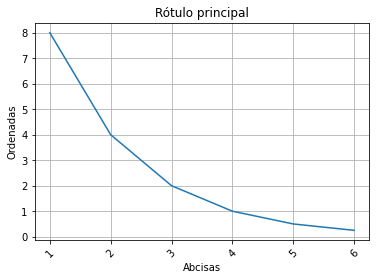

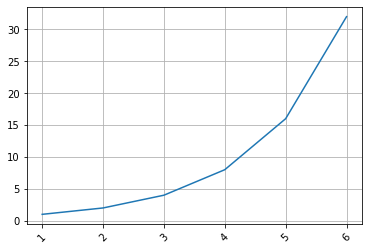

In [24]:
# Pruebas de funcionamiento:

representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], ["Rótulo principal", "Ordenadas", "Abcisas"])

representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)], [])

**d.2. Tasas de muerte por edades** 

Queremos aplicar nuestro modelo de gráfica a la representación de las tasas de accidentes mortales por edad, que hemos calculado un poco antes. Pero obtenemos una gráfica poco adecuada, porque las edades (las abcisas) están en un orden arbitrario.

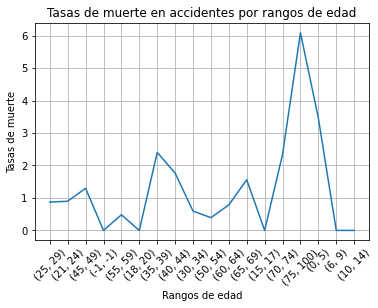

In [25]:
# Intento de representación:

rotulos = "Tasas de muerte en accidentes por rangos de edad", "Tasas de muerte", "Rangos de edad"
representar_xxx_yyy(tasa_accidentes_mortales_por_mil, rotulos)

Para remediar esto se ha de reordenar la lista de pares absisa-ordenada, atendiendo a las abcisas. También, el elemento de abcisa (-1, -1) se ha de suprimir. Esto es lo que te pido.

In [26]:
# Esta celda debe ser completada por el estudiante
def representar_xxx_yyy(datos, rotulos=[]):
    """
    Crea un gráfico de linea.
    
    Parámetros
    ----------
    datos: list 
        Lista de tuplas con dos datos. ejemplo: [(1, 4), (3, 2)]
    rotulos: list 
        Título de la grafica y de ambos ejes
    
    Returns
    -------
        gráfico
        Gráfico de linea
    """
    datos.sort()
    a, b = zip(*datos)
    x = list(a)
    y = list(b)
    for i in x:
        if i == (-1, -1):  # Eliminación del rango (-1, -1) y su tasa de muerte correspondiente
            del x[0]       # Como los datos se encuentran ordenados x[0] corresponde a (-1, -1) e y[0] a la tasa de muerte
            del y[0]       # correspondiente a ese rango.
    if rotulos == []:
        plt.grid(True)
        plt.xticks(rotation = 45)
        plt.plot([str(i) for i in x], y)
    else:
        plt.plot([str(i) for i in x], y)
        plt.ylabel(rotulos[1])
        plt.xlabel(rotulos[2])
        plt.title(rotulos[0])
        plt.grid(True)
        plt.xticks(rotation = 45)
    return plt.show()
    



<font color="darkblue">**d.2.1 Explicación de la función**

<font color="darkblue">Esta función es similar la del apartado d.1.1, solo se agregó una clausula "if" para eliminar el rango de edad (-1, -1) que se encontraba dentro del eje x, ademas de su tasa de muerte correspondiente dentro del eje y.

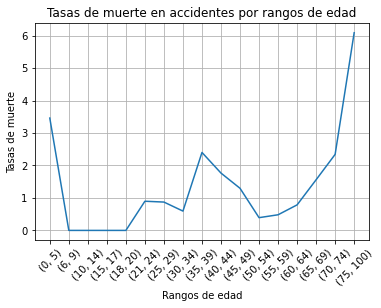

In [27]:
# Prueba de funcionamiento:

representar_xxx_yyy(tasa_accidentes_mortales_por_mil, rotulos)

**d.3. Tasas de muerte por rangos horarios** 

De forma similar a lo resuelto en los apartados anteriores, deseamos preparar los datos y un gráfico con la tasa de muerte por rangos horarios. En lugar de tratar los rangos por horas enteras (las 4 representa el intervalo entre las 4:00 y las 4:59), deseamos representar de dos en dos horas (las 4 representa el intervalo entre las 4:00 y las 5:59, las 6, entre las 6:00 y las 7:59, etc.) 

Observa que se neesitan dos fuciones, una para recopilar los datos, calcular las tasas, dar  una lista ordenada, etc., y otra para preparar las abcisas, cadenas de caracteres con las horas de dos en dos, junto con sus tasas respectivas.

In [28]:
# Esta celda debe ser completada por el estudiante
def totales_mortales_por_horario(datos):
    """
    Dado los datos de la variable "datos_lista", entrega una lista con tuplas, la cuales contiene la hora y su tasa de 
    mortalidad (en un rango de dos horas) correspondiente.
    
    Parámetros
    ----------
    datos: list
        Datos de la variable "datos_lista"
    
    Returns
    -------
        list
        Lista de tuplas con el rango de horas y su tasa de mortalidad correspondiente
    
    Ejemplo
    ------- 
    >>> horas_y_tasa_de_mortalidad = totales_mortales_por_horario(datos_lista)
    >>> print(horas_y_tasa_de_mortalidad)
    [(0, 1.9230769230769231), (2, 4.178272980501393), (4, 1.949317738791423), (6, 0.8635578583765112), (8, 1.1415525114155252), (10, 1.5337423312883436), (12, 0.8234971177600878), (14, 1.112099644128114), (16, 0.5351886540005352), (18, 0.4287245444801715), (20, 1.1999040076793857), (22, 1.187178472497032)]  
    """
    datos.sort()
    total = {}
    for linea in datos:
        if linea[0] not in total.keys() and linea[0] % 2 == 0: # Si la hora no se encuentra dentro de las llaves de total y
            if linea[4] == 4:                                  # y no es multiplo de 2, si la lasividad es igual a 4 se agrega
                total[linea[0]] = [1, 1]                       # [1, 1] con su hora-llave correspondiente al diccionario total,
            else:                                              # si la lasividad no es igual a 4 se agrega [1, 0] al diccionario
                total[linea[0]] = [1, 0]                       # ya que durante esa hora (linea[0]) no hubieron muertos.
        else:                                                  # Los valores dentro de las listas [1, 1] y [1, 0] corresponden
            if linea[0] % 2 == 0:                              # a la cantidad de accidentes ([0]) y a la cantidad de muertos ([1]).
                if linea[4] == 4:
                    total[linea[0]][0] += 1        # Al contrario, si la hora(linea[0]) se encuentra ya dentro del diccionario "total"
                    total[linea[0]][1] += 1        # y además es  múltiplo de 2, si la lasividad es igual a 4, se le suma 1 a los valores 
                else:                              # de aquella hora, en el caso de que la lasividad no fuera igual a 4 solo se le suma 1
                    total[linea[0]][0] += 1        # al valor correspondiente a la cantidad de accidentes.
            else:
                if linea[4] == 4:               # Para aquellos casos en que la hora no es multiplo de 2, y la lasividad es
                    total[linea[0] - 1][0] += 1 # igual a 4, se le suma 1 a los valores de la hora anterior, osea a
                    total[linea[0] - 1][1] += 1 # linea[0] - 1.
                else:                           # Y cuando la lasividad (linea[4]) no es igual a 4, se le suma 1 solo a valor
                    total[linea[0] - 1][0] += 1 # del total de accidentes de la hora anterior.                  
    tasa_accidentes_mortales_por_mil = [(k, m*1000/n) for k, (n, m) in total.items()] # cálculo de la tasa de muertes
    return tasa_accidentes_mortales_por_mil

In [29]:
# Esta celda debe ser completada por el estudiante
def emparejar_abcisas(datos):
    """"
    Dado los datos de la variable tasas_accidentes_y_muertes_por_horario, entrega una lista de tuplas las cuales contienen
    el rango de horas (dos horas) y su tasa de mortalidad correspondiente.
    
    Parámetros
    ----------
    datos: list 
        Datos de la variable tasas_accidentes_y_muertes_por_horario
    
    Returns
    -------
        list
        Lista de tuplas, las cuales contienen el rango de horas (2 horas) y su tasa de mortalidad correspondiente
        
    Ejemplo
    -------
    >>> rangos_y_tasa_de_mortalidad = emparejar_abcisas(tasas_accidentes_y_muertes_por_horario)
    >>> print(tasas_accidentes_y_muertes_por_horario)
    [((0, 2), 1.9230769230769231), ((2, 4), 4.178272980501393), ((4, 6), 1.949317738791423), ((6, 8), 0.8635578583765112), ((8, 10), 1.1415525114155252), ((10, 12), 1.5337423312883436), ((12, 14), 0.8234971177600878), ((14, 16), 1.112099644128114), ((16, 18), 0.5351886540005352), ((18, 20), 0.4287245444801715), ((20, 22), 1.1999040076793857), ((22, 24), 1.187178472497032)]
    """
    primera_transformacion = [list(linea) for linea in datos ] # Los datos vienen en tuplas, se transforman en listas para
    for linea in primera_transformacion:                       # poder modificarlas. Estas quedarían en formato [k, n].
        linea.insert(1, linea[0] + 2) # Se inserta en el lugar [1] la hora correspondiente + 2 (Linea[0] + 2) 
    datos_preparados = [tuple([(k, m), n])  for [k,m, n] in primera_transformacion] # Transformacion desde el formato
    return datos_preparados                                                              # [k, m, n] a ("(k, m)", n).

<font color="darkblue">**d.3.1 Explicación de la función**

<font color="darkblue">La función totales_mortales_por_horario() es algo compleja de explicar, pero en palabras simples, se comienza por generar un diccionario vacío con el nombre total, este diccionario se ira llenando con las horas (keys) las cuales deben cumplir el requisito de ser multiplo de 2. Los valores de las horas, las cuales corresponden al numero de accidentes y numeros de muertos se les ira sumando 1 en el caso en que hayan muertos en aquella lista de datos, en el caso contrario, de que no hayan muertos, se le sumara 1 solo al numero de accidentes. Para los casos en que las horas no sean multiplo de 2, sus valores pasaran a sumarse a los valores de la hora anterior, se le sumara 1 a ambos valores o solo al numero de accidentes dependiendo de si hay o no muertos (lasividad = 4). La función entregará una lista de tuplas las cuales contienen la hora y su tasa de muertes, calculada con las suma de los valores de la hora correspondiente con la siguiente.

<font color="darkblue">Para la función emparejar abscisas(), se comenzó por transformar en lista cada una de las tuplas dentro de la lista de datos, esto permite que sean modificadas. Luego en cada una de las listas se le inserta un datos mas en el lugar [1], este dato corresponde a la suma entre la hora y 2, esto permite generar rangos de horas de dos en dos (ejemplo: (0, 2), (2, 4),...). Se finaliza transformando las listas al formato adecuado.

[(0, 1.9230769230769231), (2, 4.178272980501393), (4, 1.949317738791423), (6, 0.8635578583765112), (8, 1.1415525114155252), (10, 1.5337423312883436), (12, 0.8234971177600878), (14, 1.112099644128114), (16, 0.5351886540005352), (18, 0.4287245444801715), (20, 1.1999040076793857), (22, 1.187178472497032)]

[((0, 2), 1.9230769230769231), ((2, 4), 4.178272980501393), ((4, 6), 1.949317738791423), ((6, 8), 0.8635578583765112), ((8, 10), 1.1415525114155252), ((10, 12), 1.5337423312883436), ((12, 14), 0.8234971177600878), ((14, 16), 1.112099644128114), ((16, 18), 0.5351886540005352), ((18, 20), 0.4287245444801715), ((20, 22), 1.1999040076793857), ((22, 24), 1.187178472497032)]


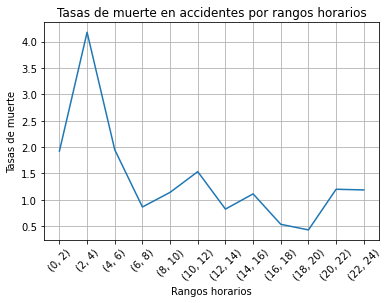

In [30]:
# Prueba de funcionamiento:

tasas_accidentes_y_muertes_por_horario = totales_mortales_por_horario(datos_lista)

print(tasas_accidentes_y_muertes_por_horario)

print()

datos_para_grafica = emparejar_abcisas(tasas_accidentes_y_muertes_por_horario)

print(datos_para_grafica)

rotulos = "Tasas de muerte en accidentes por rangos horarios", "Tasas de muerte", "Rangos horarios"
representar_xxx_yyy(datos_para_grafica, rotulos)

## e) Operaciones con dataframes [1.5 puntos]

En este apartado, vamos a trabajar con tablas de la librería `pandas`, llamadas `dataframes`.

**e1. Carga del dataframe.**
La primera operación que necesitamos es cargar el archivo de datos en una tabla, como se ve en el siguiente ejemplo.

In [31]:
# Esta celda debe ser completada por el estudiante
import pandas

def cargar_dataframe_v0(datos):
    """
    Crea una tabla desde el archivo "2020_Accidentalidad.csv" con las columnas de hora, distrito, rango de edad y lesividad.  
    
    Parámetros
    ----------
    datos: str 
        Archivo "2020_Accidentalidad.csv"
    
    Returns
    -------
    dataframe
        Una tabla con las columnas de hora, distrito, rango de edad y lesividad
    
    Ejemplo
    -------
    >>> primera_tabla = cargar_dataframe_v0("2020_Accidentalidad.csv")
    >>> print(primera_tabla)
            HORA             DISTRITO    RANGO DE EDAD  LESIVIDAD*
    0      23:15               RETIRO  DE 25 A 29 AÑOS         NaN
    1      22:35      MONCLOA-ARAVACA  DE 21 A 24 AÑOS         6.0
    2      20:15  FUENCARRAL-EL PARDO  DE 45 A 49 AÑOS        14.0
    3      20:15  FUENCARRAL-EL PARDO  DE 25 A 29 AÑOS         7.0
    4      19:45               CENTRO      DESCONOCIDA         NaN
    ...      ...                  ...              ...         ...
    32415   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN
    32416   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN
    32417   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN
    32418   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN
    32419   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN

    [32420 rows x 4 columns]
    """
    data_frame = pandas.read_csv(datos, sep = ";", encoding = "latin1", usecols=("HORA", "DISTRITO", "RANGO DE EDAD", "LESIVIDAD*"))
    return data_frame
    


<font color="darkblue">**e.1.1 Explicación de la función**

<font color="darkblue">La función cargar_dataframe_v0() permite la carga de datos desde un archivo csv, para esto se utilizó la función read_csv() especificando su separador, encoding, y las columnas a cargar.

In [32]:
# Prueba de funcionamiento:
tabla_pre = cargar_dataframe_v0("2020_Accidentalidad.csv")
print(tabla_pre)

        HORA             DISTRITO    RANGO DE EDAD  LESIVIDAD*
0      23:15               RETIRO  DE 25 A 29 AÑOS         NaN
1      22:35      MONCLOA-ARAVACA  DE 21 A 24 AÑOS         6.0
2      20:15  FUENCARRAL-EL PARDO  DE 45 A 49 AÑOS        14.0
3      20:15  FUENCARRAL-EL PARDO  DE 25 A 29 AÑOS         7.0
4      19:45               CENTRO      DESCONOCIDA         NaN
...      ...                  ...              ...         ...
32415   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN
32416   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN
32417   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN
32418   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN
32419   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN

[32420 rows x 4 columns]


**e2. Carga del dataframe, codificando rangos de edad y lesividad.**
Ahora, queremos modificar esta lectura para que los rangos de edad se conviertan en el intervalo correspondiente. Además, vemos que el nivel de lesividad se ha leído directamente como un real, y las cadenas en blanco se han traducido a `NaN` (*Not a Number*). Queremos ponerlo como un entero, consistente en un 1 cuando hay lesividad. Cuando no se conoce la lesividad, o no hay lesividad (casos codificados con un 0, un 77, un 14), anotamos un 0 en la tabla.

In [33]:
# Esta celda debe ser completada por el estudiante
def cambio_lesividad(datos):
    """
    Dado un dato de la columna "LESIVIDAD*", entrega 1 o 0 dependiendo de si hubo lesividad o no.
    
    Parameters
    ----------
    datos: str 
        Datos de la columna "LESIVIDAD*"
    
    Returns
    -------
    int
        1 o 0 dependiendo de si hubo lasividad o no.
    
    Ejemplo
    -------
    >>> cambio_lesividad('05')
    1
    >>> cambio_lesividad("77")
    0
    """
    datos = int(datos)
    if datos == 0 or datos == 77 or datos == 14:  # Poner 0 en el caso en que la lasividad sea igual a 0, 77 o 14, 
        datos = 0                                 # en el caso contrario poner 1.
    else:
        datos = 1
    return datos





In [34]:
def cargar_dataframe(datos):
    """
    Dado como parámetro el archivo "2020_Accidentalidad", carga las columnas de hora, distrito, rango de edad (en formato de rangos)
    y lesividad (con los datos cambiados a 0 o 1 dependiendo de si hubo lesividad o no)
    
    Parámetros
    ----------
    datos: str 
        Archivo "2020_Accidentalidad.csv"
    
    Returns
    -------
    dataframe 
        Dataframe con las columnas de hora, distrito, rango de edad (en formato de rango (a, a + 4)) y lesividad (con 0 y 1
        dependiendo de si hubo lesividad o no)
    
    Ejemplo
    -------
    >>> dataframe_principal = cargar_dataframe("2020_Accidentalidad.csv")
    >>> dataframe_principal
    	HORA	DISTRITO	RANGO DE EDAD	LESIVIDAD*
    0	23:15	RETIRO	(25, 29)	0
    1	22:35	MONCLOA-ARAVACA	(21, 24)	1
    2	20:15	FUENCARRAL-EL PARDO	(45, 49)	0
    3	20:15	FUENCARRAL-EL PARDO	(25, 29)	1
    4	19:45	CENTRO	(-1, -1)	0
    ...	...	...	...	...
    32415	0:18	CHAMARTÍN	(35, 39)	0
    32416	0:18	CHAMARTÍN	(35, 39)	0
    32417	0:18	CHAMARTÍN	(35, 39)	0
    32418	0:18	CHAMARTÍN	(35, 39)	0
    32419	0:18	CHAMARTÍN	(35, 39)	0
    32420 rows × 4 column
    """
    data_frame = pandas.read_csv(datos, sep = ";", encoding = "latin1", usecols=("HORA", "DISTRITO", "RANGO DE EDAD", "LESIVIDAD*"))
    data_frame["RANGO DE EDAD"] = data_frame["RANGO DE EDAD"].apply(rango_edad)
    data_frame["LESIVIDAD*"] = data_frame["LESIVIDAD*"].fillna(0) # Reemplaza NaN por 0
    data_frame["LESIVIDAD*"] = data_frame["LESIVIDAD*"].apply(cambio_lesividad)
    return data_frame

<font color="darkblue">**e.2.1 Explicación de la función**

<font color="darkblue">Para lograr cambiar los datos de la columna de lasividad, primero se creo una función (cambio_lesividad()) que mediante una clausula "if" convierte los datos iguales a 0, 77, 14 en 0, y los a los datos distintos a esos numeros, en 1.

<font color="darkblue">La función cargar_dataframe(), devuelve un dataframe con las columnas "HORA", "DISTRITO", "RANGO DE EDAD" y "LESIVIDAD*", además cambia el formato de las columnas "RANGO DE EDAD" y "LESIVIDAD*", mediante la utilización de las funciones rango_edad() y cambio_lesividad().



In [35]:
# Prueba de funcionamiento:
tabla = cargar_dataframe("2020_Accidentalidad.csv")
tabla

,HORA,DISTRITO,RANGO DE EDAD,LESIVIDAD*
0,23:15,RETIRO,"(25, 29)",0
1,22:35,MONCLOA-ARAVACA,"(21, 24)",1
2,20:15,FUENCARRAL-EL PARDO,"(45, 49)",0
3,20:15,FUENCARRAL-EL PARDO,"(25, 29)",1
4,19:45,CENTRO,"(-1, -1)",0
...,...,...,...,...
32415,0:18,CHAMARTÍN,"(35, 39)",0
32416,0:18,CHAMARTÍN,"(35, 39)",0
32417,0:18,CHAMARTÍN,"(35, 39)",0
32418,0:18,CHAMARTÍN,"(35, 39)",0


**e3. Tabla de número de accidentes por rangos de edad**

Nos interesa quedarnos únicamente con dos columnas: el rango de edad y el número de accidentes, formando una tabla nueva. Esta tabla debe mostrarse en orden ascendente de rango de edad.

In [36]:
# Esta celda debe ser completada por el estudiante
def accidentes_por_rango_de_edad(datos):
    """
    Dataframe con las columnas de rango de edad y número de accidentes.
    
    Parámetros
    ----------
    datos: dataframe 
        Variable "tabla"
    
    Returns
    -------
        dataframe
        Dataframe con las columnas de edad y número de accidentes
        
    Ejemplo
    -------
    >>> tabla_1 = accidentes_por_rango_de_edad(tabla)
    >>> tabla_1
    Edad	NumAcc
    0	(-1, -1)	3962
    1	(0, 5)	289
    2	(6, 9)	175
    3	(10, 14)	305
    4	(15, 17)	250
    5	(18, 20)	978
    6	(21, 24)	2226
    7	(25, 29)	3437
    8	(30, 34)	3362
    9	(35, 39)	3332
    10	(40, 44)	3399
    11	(45, 49)	3084
    12	(50, 54)	2547
    13	(55, 59)	2077
    14	(60, 64)	1272
    15	(65, 69)	641
    16	(70, 74)	427
    17	(75, 100)	657
    """
    datos = pandas.DataFrame(datos["RANGO DE EDAD"])
    datos = datos.groupby(by='RANGO DE EDAD', as_index=False).size()
    datos = datos.sort_values(by = "RANGO DE EDAD", ascending = True)
    datos.columns = ["Edad", "NumAcc"] # Cambio de nombres de las columnas
    return datos



<font color="darkblue">**e.3.1 Explicación de la función**

<font color="darkblue">La función accidentes_por_rango_de_edad() entrega un dataframe con dos columnas, estas son "Edad" y "NumAcc"". Esto se logra cargando solo los datos de la columna "RANGO DE EDAD" y aplicando las funciones groupby() y size(), las cuales permiten agrupar los datos por rango de edad y calcular los números de accidentes por rango.

In [37]:
# Prueba de funcionamiento:
tabla2 = accidentes_por_rango_de_edad(tabla)
tabla2

,Edad,NumAcc
0,"(-1, -1)",3962
1,"(0, 5)",289
2,"(6, 9)",175
3,"(10, 14)",305
4,"(15, 17)",250
5,"(18, 20)",978
6,"(21, 24)",2226
7,"(25, 29)",3437
8,"(30, 34)",3362
9,"(35, 39)",3332


Esta tabla contiene el rango de edad $(-1, -1)$, que no nos interesa. Por eso preferimos descartar esta fila.

In [38]:
# Esta celda debe ser completada por el estudiante
def eliminar_primera_fila(dataframe):
    """
    Dado un dataframe, devuelve el mismo dataframe pero sin la primera fila.
    
    Parámetros
    ----------
    dataframe: dataframe
    
    Returns
    -------
    dataframe
        The same dataframe but without the first row
    
    Ejemplo
    -------
    >>> tabla_1
    	Edad	NumAcc
    0	(0, 5)	289
    1	(6, 9)	175
    2	(10, 14)	305
    3	(15, 17)	250
    >>> tabla_2 = eliminar_primera_fila(tabla_1)
    >>> tabla_2
    	Edad	NumAcc
    1	(6, 9)	175
    2	(10, 14)	305
    3	(15, 17)	250
    """
    dataframe = dataframe.drop(0) # Eliminación de la primera fila correspondiente a (-1, -1)
    return dataframe



In [39]:
# Prueba de fucionamiento:
tabla2 = eliminar_primera_fila(tabla2)
tabla2

,Edad,NumAcc
1,"(0, 5)",289
2,"(6, 9)",175
3,"(10, 14)",305
4,"(15, 17)",250
5,"(18, 20)",978
6,"(21, 24)",2226
7,"(25, 29)",3437
8,"(30, 34)",3362
9,"(35, 39)",3332
10,"(40, 44)",3399


**e4. Accidentes con consecuencias médicas.**

Queremos totalizar ahora los accidentes que requieren algún tipo de atención sanitaria o con resultado de muerte por cada rango de edad.

In [40]:
# Esta celda debe ser completada por el estudiante
def lesividad_por_rango_de_edad(datos):
    """
    Datframe con las columnas de edad y numaccconlesiones.
    
    Parámetros
    ----------
    datos: dataframe 
        Dataframe "tabla"
    
    Returns
    -------
    dataframe
        Dataframe con las columnas de edad y numaccconlesiones
    """
    datos = pandas.DataFrame(datos.loc[:,["RANGO DE EDAD", "LESIVIDAD*"]])
    datos = datos.groupby(by='RANGO DE EDAD', as_index=False).sum() # Agrupa por rango y suma los datos de los accidentes con lesiones
    datos = datos.sort_values(by = "RANGO DE EDAD", ascending = True)
    datos.columns = ["Edad", "NumAccsConLesiones"]
    datos = eliminar_primera_fila(datos)
    return datos



<font color="darkblue">**e.4.1 Explicación de la función**

<font color="darkblue">Esta función agrupa los rangos de edad, sumando los datos de la columna "LESIVIDAD*".

In [41]:
# Prueba de funcionamiento:
tabla3 = lesividad_por_rango_de_edad(tabla)
tabla3

,Edad,NumAccsConLesiones
1,"(0, 5)",107
2,"(6, 9)",73
3,"(10, 14)",135
4,"(15, 17)",114
5,"(18, 20)",325
6,"(21, 24)",720
7,"(25, 29)",1184
8,"(30, 34)",1098
9,"(35, 39)",944
10,"(40, 44)",899


**e5. Unión de dos tablas.**

Deseamos ahora combinar las dos tablas generadas, usando la columna "Edad" como pivote, al estilo de la operación `inner join` de SQL en el mundo de las bases de datos. 

In [42]:
# Esta celda debe ser completada por el estudiante
def union_tablas(tabla_1, tabla_2):
    """
    Une dos dataframes que contengan una columna en común.
    
    Parámetros
    ----------
    tabla_1: dataframe
        Primer dataframe
    tabla_2: dataframe
        Segundo dataframe
    
    Returns
    -------
    dataframe
        Un nuevo dataframe creado a partir de dos dataframes.
    """
    tablas_unidas = tabla_1.merge(tabla_2, on = "Edad", how = "inner") # Unión de dos tablas con merge()
    return tablas_unidas


<font color="darkblue">**e.5.1 Explicación de la función**

<font color="darkblue">La función union_tablas() permite la unión de dos tablas usando como pivote la columna "Edad". La unión se produce a través de la función merge(). 

In [43]:
# Prueba de funcionamiento:
tabla4 = union_tablas(tabla2, tabla3)
tabla4

,Edad,NumAcc,NumAccsConLesiones
0,"(0, 5)",289,107
1,"(6, 9)",175,73
2,"(10, 14)",305,135
3,"(15, 17)",250,114
4,"(18, 20)",978,325
5,"(21, 24)",2226,720
6,"(25, 29)",3437,1184
7,"(30, 34)",3362,1098
8,"(35, 39)",3332,944
9,"(40, 44)",3399,899


**e6. Proporción de accidentes con lesiones.**

Deseamos ahora ver las cifras de lesiones en términos relativos, esto es, como el porcentaje  proporcióde accidentes en que se producen lesiones. 

In [44]:
# Esta celda debe ser completada por el estudiante
def agregar_proporcion_de_accidentes_con_lesiones(data):
    """
    Agrega la columna "PropLesiones"
    
    Parameters
    ----------
    data: dataframe 
        Dataframe "tabla4"
    
    Returns
    -------
        dataframe
        El mismo dataframe pero con la columna "PropLesiones" agregada
    """
    data["PropLesiones"] = data["NumAccsConLesiones"] / data["NumAcc"] * 100 # Se agrega columna "PropLesiones"
    return data



<font color="darkblue">**e.6.1 Explicación de la función**

<font color="darkblue">La función agrega una columna al dataframe entregado, la nueva columna se llama "PropLesiones" la cual corresponde a la proporción de accidentes, en el rango de edad correspondiente, en que se producen lesiones.


In [45]:
# Prueba de funcionamiento:
tabla5 = agregar_proporcion_de_accidentes_con_lesiones(tabla4)
tabla5

,Edad,NumAcc,NumAccsConLesiones,PropLesiones
0,"(0, 5)",289,107,37.024221
1,"(6, 9)",175,73,41.714286
2,"(10, 14)",305,135,44.262295
3,"(15, 17)",250,114,45.600000
4,"(18, 20)",978,325,33.231084
5,"(21, 24)",2226,720,32.345013
6,"(25, 29)",3437,1184,34.448647
7,"(30, 34)",3362,1098,32.659131
8,"(35, 39)",3332,944,28.331333
9,"(40, 44)",3399,899,26.448956


**e6. Gráfico.**

Finalmente, deseamos presentar la proporción de accidentes con lesiones por edades, por si al ver esto pudiéramos extraer alguna conclusión útil.

In [46]:
# Esta celda debe ser completada por el estudiante
def representar_grafica_dataframe(datos, rotulos = []):
    """
    Dado un dataframe y los rotulos, entrega un gráfico de linea.
    
    Parámetros
    ----------
    data: dataframe 
    rotulos: list 
        Nombre de las columnas que seran usadas
    
    Returns
    -------
        gráfico
        Gráfico de linea
    """
    datos[rotulos[1]] = datos[rotulos[1]].apply(str) # Convierte en string los rangos de edad.
    xs = datos[rotulos[1]] # Definición de datos para el eje x.
    ys = datos[rotulos[2]] # Definición de daros para el eje y.
    plt.plot(xs, ys)
    plt.grid(True)
    plt.xlabel(rotulos[1])
    plt.ylabel(rotulos[2])
    plt.title(rotulos[0])
    plt.xticks(rotation = 45)
    return plt.show()
    


<font color="darkblue">**e.6.2 Explicación de la función**

<font color="darkblue">La función representar_grafica_dataframe() entrega una representacion grafica de la proporción de accidentes por rangos de edad. La gráfica se genera primero definiendo las columnas de datos para los ejes x e y, luego mediante la utilizacion de las funciones provenientes de la librería matplotlib.

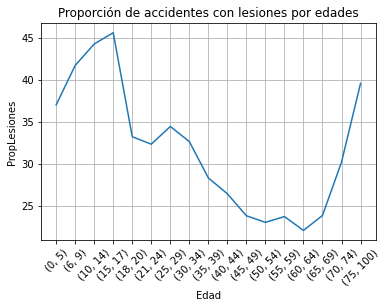

In [47]:
representar_grafica_dataframe(tabla5, ["Proporción de accidentes con lesiones por edades", "Edad", "PropLesiones"])

## f) Un cálculo masivo con map-reduce [0.5 puntos]

En este apartado se ha de realizar un programa aparte que calcule, para cada rango de edad, un par de enteros con los totales de podría activarse así desde la consola:

    C:\...> python total_accs_edad.py -q 2020_Accidentalidad.csv

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

In [48]:
# Hagamos una llamada al programa de consola desde aquí:

! python total_accs_edad.py -q 2020_Accidentalidad.csv

[0,5]	[289,1]
[10,14]	[305,0]
[15,17]	[250,0]
[18,20]	[978,0]
[21,24]	[2226,2]
[25,29]	[3437,3]
[30,34]	[3362,2]
[35,39]	[3332,8]
[40,44]	[3399,6]
[45,49]	[3084,4]
[50,54]	[2547,1]
[55,59]	[2077,1]
[6,9]	[175,0]
[60,64]	[1272,1]
[65,69]	[641,1]
[70,74]	[427,1]
[75,100]	[657,4]


In [49]:
# Para que el resultado se almacene en un archivo:

! python total_accs_edad.py -q 2020_Accidentalidad.csv  > accidentalidad_y_mortalidad_por_edades.txt

Para que pueda yo ver tu programa cómodamente desde aquí, también se puede mostrar con un comando de la consola, anteponiendo el símbolo `!`.

**Notas.** 1) La instrucción siguiente está comentada para ocultar una solución mía. 2) Desde mac o linux, se ha de usar el comando `cat`, en vez de `type`.

In [50]:
# ! type total_accs_edad.py

## g) Un apartado libre [0.5 puntos]

Dejo este apartado a tu voluntad. Inventa tú mismo el enunciado y resuélvelo, mostrando algún aspecto de programación en Python no contemplado o alguna técnica o librería que no has puesto en juego en los apartados anterioresc, relacionado con el análisis de datos o con este proyecto. He aquí dos ejemplos posibles:

- Me he quedado un poco insatisfecho con el uso de pandas, un poco escaso: este apartado adicional podría usar dicha librería poniendo en juego algunas operaciones que no hemos visto.

- Tampoco me gusta mucho el acabado de las figuras:
  la librería Plotly puede ser quizá permitirte trazar figuras más profesionales,
  y una posibilidad sencilla es quizá
  importar los datos del archivo creado por el programa de map-reduce y representarlos gráficamente.
  
Estos ejemplos pueden servirte como pista, pero que no te limiten: puedes proponer tú algo que te parezca oportuno, para mostrar algún aspecto que no se cubra bien en los apartados anteriores, relacionado con el análisis de datos o con este proyecto pero o para practicar con una librería que te parezca interesante.

<font color="darkblue">**g.1 Enunciado apartado libre**

<font color="darkblue">Realizar mapa de calor utilizando la librería seaborn. El mapa de calor debe relacionar los diferentes distritos con las horas y ademas el número de accidentes, así se podra obtener una visión mas completa de donde y a que hora se producen los accidentes.

In [51]:
# Este apartado debe ser completado por el estudiante
import seaborn as sns

def rango_hora(hora):
    """
    Dada una hora en formato entero , entrega un rango de horas en el formato (h, h + 1).
    
    Parámetros
    ----------
    hora: int
        Número entre 0 y 23
    
    Returns
    -------
    tuple
          Un rango horario de una hora en el formato (h, h + 1)
          
    Example
    -------
    >>>rango_hora(2)
    (2, 3)
    """
    hora = (hora, hora + 1) #Creación de rangos de horas
    return hora



In [52]:
def accidentes_por_hora_y_distrito(datos):   
    """
    Mapa de calor de las columnas "HORA", "DISTRITO" and "ACCIDENTES" (número de accidentes).
    
    Parámetros
    ----------
    datos: dataframe
        Dataframe "tabla"
    
    Returns
    -------
        heatmap
        Mapa de calor
    """
    datos = pandas.DataFrame(datos.loc[:,["HORA", "DISTRITO"]]) # Carga de las columnas necesarias.
    datos["HORA"] = datos["HORA"].apply(redondeo_hora) 
    datos["HORA"] = datos["HORA"].apply (rango_hora)
    datos["ACCIDENTES"] = 1  # Creación de columna "ACCIDENTES", todos sus datos serán igual a 1 para luego poder sumarlos.
    datos = datos.groupby(["DISTRITO", "HORA"], as_index = False).sum() # Agrupación y suma.
    datos = datos.pivot(index = "HORA", columns = "DISTRITO", values = "ACCIDENTES")  # Cambio de formato del dataframe.
    datos = datos.sort_values("HORA", ascending = False)
    plt.figure(figsize=(15, 10))
    grafica = sns.heatmap(datos, linewidth=0.3,  cmap = "YlOrRd")
    return grafica

<font color="darkblue">**g.1.1 Explicación de la función**

<font color="darkblue">Como primer paso se generó la funcion rango_hora() la que permite, entregada una hora en formato entero, crear un rango de hora, ejemplo: (13, 14).

<font color="darkblue">Luego la función accidentes_por_hora_y_distrito() permite la creación del mapa de calor, mediante la utilización de las funciones de la librería "Seaborn". Pero antes de esto, se prepararan los datos cargados mediante las funciones redondeo_hora() y rango_hora(), además se cambia el formato del dataframe generado mediante la función pivot(), tomando como columnas los diferentes distritos y como filas los rangos de edad.

<AxesSubplot:xlabel='DISTRITO', ylabel='HORA'>

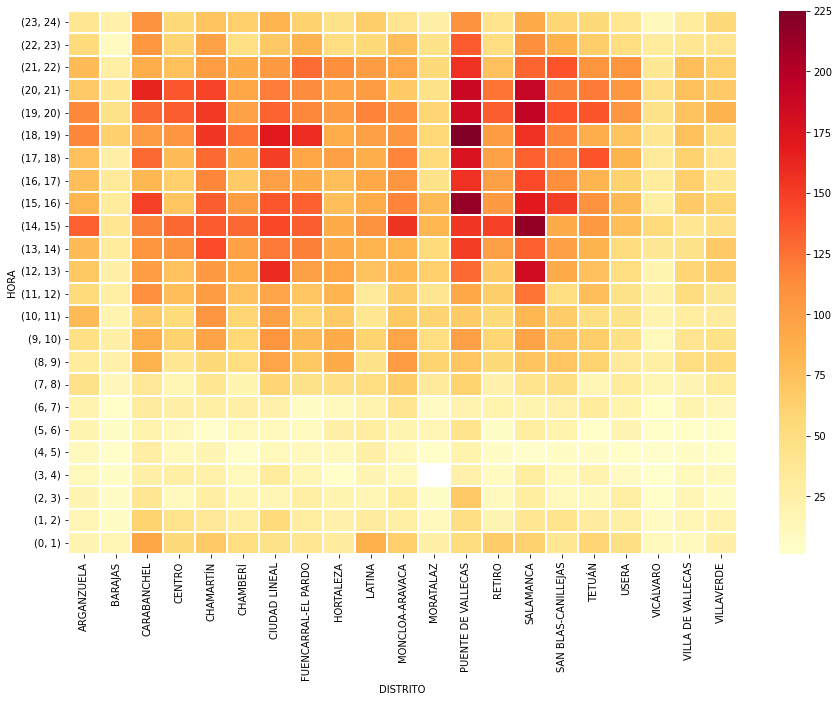

In [53]:
# Pruebas de funcionamiento:
mapa_de_calor = accidentes_por_hora_y_distrito(tabla)
mapa_de_calor




### Datos personales

<br>

<font color="darkblue">

-   **Apellidos:** Kneis Pino
-   **Nombre:** Mathias
-   **Email:** mkneis@outlook.com
-   **Fecha:** 25/01/2022

<br>

<font color="black">
    
### Ficha de autoevaluación

<br>

<font color="darkblue">

**Comentarios sobre la autoevaluación**: 
<font color="green">


<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.0  / 2.0  |Completamente resuelto |
|b)  |2.0  / 2.0  |Completamente resuelto |
|c)  |2.0 / 2.0  |Completamente resuelto |
|d)  |1.5 / 1.5  |Completamente resuelto |
|e)  |1.5  / 1.5  |Completamente resuelto |
|f)  |0.5  / 0.5  |Completamente resuelto |
|g)  |0.5  / 0.5  |Completamente resuelto |
|**Total** |**10.0** / 10.0|****|

</font>

<font color="black">
    
### Ayuda recibida y fuentes utilizadas

<br>
    
<font color="darkblue">
Aparte del material suministrado por el profesor, se utilizaron las siguientes páginas web para la búsqueda de algunas funciones nativas de python:
    
    - https://stackoverflow.com/
    - https://www.w3schools.com/python/

Además para la realización del apartado libre, se utilizó como guía el siguiente video:
    
    - https://www.youtube.com/watch?v=Y39UqQrZxnY

<br>

<br>

<font color="black">
    
### Comentario adicional

<br>

<font color="darkblue">
... Este apartado es optativo ...

<br>

In [54]:
# Esta celda se ha de respetar: está aquí para comprobar el funcionamiento de algunas funciones por parte de tu profesor